In [3]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#the time is in duration (timedelta) format so that needs to be changed in the future
#here i load the libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()

In [4]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
January=pd.read_csv("January.csv")
January.drop('Unnamed: 0',axis=1,inplace=True)
January.info()
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 416.5+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01T00:10:00Z,2016-01-01T00:10:00Z,PT0S
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01T00:10:00Z,2016-01-01T00:10:00Z,PT0S
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01T00:11:00Z,2016-01-01T00:11:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31T22:58:00Z,2016-01-31T22:58:00Z,PT0S
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31T23:00:00Z,2016-01-31T23:00:00Z,PT0S
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31T23:00:00Z,2016-01-31T23:00:00Z,PT0S
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31T23:01:00Z,2016-01-31T23:01:00Z,PT0S


In [5]:
#First I make a date from the date planned departure, then i make it a string in a new column so i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
January['Train Departure Planned']=pd.to_datetime(January['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
January['Train Departure Planned1']=January['Train Departure Planned'].astype(str)
January[['DepartureDatePlanned','DepartureTimePlanned']]= January['Train Departure Planned1'].str.split(' ', expand = True)
January['DepartureDatePlanned']=pd.to_datetime(January['DepartureDatePlanned'])
January
#then i make the planned depature time a time delta (Actually want to make it a normal time format)
January['DepartureTimePlanned'] = January.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
January.drop('Train Departure Planned1', axis=1, inplace=True)
print(January.info())
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 499.8+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01T00:10:00Z,PT0S,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01T00:10:00Z,PT0S,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01T00:11:00Z,PT0S,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31T22:58:00Z,PT0S,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31T23:00:00Z,PT0S,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31T23:00:00Z,PT0S,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31T23:01:00Z,PT0S,2016-01-31,00:00:00


In [6]:
# here i basically do the same but for the actual depature
January['Train Departure Actual']=pd.to_datetime(January['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
January['Train Departure Actual1']=January['Train Departure Actual'].astype(str)
January[['DepartureDateActual','DepartureTimeActual']]= January['Train Departure Actual1'].str.split(' ', expand = True)
January['DepartureDateActual']=pd.to_datetime(January['DepartureDateActual'])
January
January['DepartureTimeActual'] = January.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
January.drop('Train Departure Actual1', axis=1, inplace=True)
print(January.info())
January

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458998 entries, 0 to 5458997
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     datetime64[ns]
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
 12  DepartureDateActual        datetime64[ns]
 13  DepartureTimeActual        object        
dtypes: datetime64[ns](4), int64(1), object(9)
memory usage: 583.1+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,PT0S,2016-01-01,00:00:00,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31 22:58:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31 23:01:00,PT0S,2016-01-31,00:00:00,2016-01-31,00:00:00


In [7]:
#Then i also put the delay in time delta format
January['Train Delay']=pd.to_timedelta(January['Train Delay'].str.strip())
January

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days 00:00:00,2016-01-01,00:00:00,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31 22:58:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31 23:01:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00


In [8]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
February=pd.read_csv("February.csv")
February.drop('Unnamed: 0',axis=1,inplace=True)
February.info()
February

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099991 entries, 0 to 5099990
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 389.1+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
3,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
4,BGN,Bergen op Zoom,2674,Intercity,NS,Vlissingen,Vlissingen,2016-01-31T23:01:00Z,2016-01-31T23:01:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5099986,WL,Wehl,30928,Stoptrein,Arriva,Arnhem,Arnhem,2016-02-29T07:58:00Z,2016-02-29T08:00:45Z,PT2M45S
5099987,HLM,Haarlem,2118,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-29T07:47:00Z,2016-02-29T07:47:00Z,PT0S
5099988,HT,'s-Hertogenbosch,16026,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-02-29T08:02:00Z,2016-02-29T08:02:00Z,PT0S
5099989,UT,Utrecht Centraal,303528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-02-29T08:43:00Z,2016-02-29T08:43:00Z,PT0S


In [9]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
February['Train Departure Planned']=pd.to_datetime(February['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
February['Train Departure Planned1']=February['Train Departure Planned'].astype(str)
February[['DepartureDatePlanned','DepartureTimePlanned']]= February['Train Departure Planned1'].str.split(' ', expand = True)
February['DepartureDatePlanned']=pd.to_datetime(February['DepartureDatePlanned'])
February.drop('Train Departure Planned1', axis=1, inplace=True)
February
#then i make the depature time a time delta (Actually want to make it a normal time format)
February['DepartureTimePlanned'] = February.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(February.info())
February
# then i basically do the same but for the actual departure
February['Train Departure Actual']=pd.to_datetime(February['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
February['Train Departure Actual1']=February['Train Departure Actual'].astype(str)
February[['DepartureDateActual','DepartureTimeActual']]= February['Train Departure Actual1'].str.split(' ', expand = True)
February['DepartureDateActual']=pd.to_datetime(February['DepartureDateActual'])
February.drop('Train Departure Actual1', axis=1, inplace=True)
February
February['DepartureTimeActual'] = February.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(February.info())
February
#Then i also put the delay in time delta format
February['Train Delay']=pd.to_timedelta(February['Train Delay'].str.strip())
February

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099991 entries, 0 to 5099990
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 466.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099991 entries, 0 to 5099990
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-02-01 00:10:00,2016-02-01 00:10:00,0 days 00:00:00,2016-02-01,00:00:00,2016-02-01,00:00:00
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-01 00:10:00,2016-02-01 00:10:00,0 days 00:00:00,2016-02-01,00:00:00,2016-02-01,00:00:00
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-02-01 00:10:00,2016-02-01 00:10:00,0 days 00:00:00,2016-02-01,00:00:00,2016-02-01,00:00:00
3,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-02-01 00:10:00,2016-02-01 00:10:00,0 days 00:00:00,2016-02-01,00:00:00,2016-02-01,00:00:00
4,BGN,Bergen op Zoom,2674,Intercity,NS,Vlissingen,Vlissingen,2016-01-31 23:01:00,2016-01-31 23:01:00,0 days 00:00:00,2016-01-31,00:00:00,2016-01-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099986,WL,Wehl,30928,Stoptrein,Arriva,Arnhem,Arnhem,2016-02-29 07:58:00,2016-02-29 08:00:45,0 days 00:02:45,2016-02-29,00:00:00,2016-02-29,00:00:00
5099987,HLM,Haarlem,2118,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-29 07:47:00,2016-02-29 07:47:00,0 days 00:00:00,2016-02-29,00:00:00,2016-02-29,00:00:00
5099988,HT,'s-Hertogenbosch,16026,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-02-29 08:02:00,2016-02-29 08:02:00,0 days 00:00:00,2016-02-29,00:00:00,2016-02-29,00:00:00
5099989,UT,Utrecht Centraal,303528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-02-29 08:43:00,2016-02-29 08:43:00,0 days 00:00:00,2016-02-29,00:00:00,2016-02-29,00:00:00


In [11]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
March=pd.read_csv("March.csv")
March.drop('Unnamed: 0',axis=1,inplace=True)
March.info()
March

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433078 entries, 0 to 5433077
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 414.5+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,LEDN,Leiden Centraal,2691,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-29T22:57:00Z,2016-02-29T23:03:34Z,PT6M34S
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-03-01T00:10:00Z,2016-03-01T00:10:00Z,PT0S
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-03-01T00:10:00Z,2016-03-01T00:10:00Z,PT0S
3,CL,Culemborg,16084,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-02-29T22:59:00Z,2016-02-29T22:59:00Z,PT0S
4,CAS,Castricum,14889,Sprinter,NS,Hoorn,Hoorn,2016-02-29T22:59:00Z,2016-02-29T22:59:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5433073,ASSP,Amsterdam Science Park,5889,Sprinter,NS,Amersfoort,Amersfoort,2016-03-31T22:00:00Z,2016-03-31T22:00:36Z,PT36S
5433074,WP,Weesp,4684,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-03-31T22:03:00Z,2016-03-31T22:03:00Z,PT0S
5433075,ZP,Zutphen,3691,Intercity,NS,Arnhem,Arnhem,2016-03-31T21:58:00Z,2016-03-31T21:59:30Z,PT1M30S
5433076,GDG,Gouda Goverwelle,9882,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-03-31T22:04:00Z,2016-03-31T22:04:00Z,PT0S


In [12]:
#First I make a date from the date planned departure, then i make it a string in a new column for i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
March['Train Departure Planned']=pd.to_datetime(March['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
March['Train Departure Planned1']=March['Train Departure Planned'].astype(str)
March[['DepartureDatePlanned','DepartureTimePlanned']]= March['Train Departure Planned1'].str.split(' ', expand = True)
March['DepartureDatePlanned']=pd.to_datetime(March['DepartureDatePlanned'])
March.drop('Train Departure Planned1', axis=1, inplace=True)
March
#then i make the depature time a time delta (Actually want to make it a normal time format)
March['DepartureTimePlanned'] = March.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(March.info())
March
#then i basically do the same but for the actual departure
March['Train Departure Actual']=pd.to_datetime(March['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
March['Train Departure Actual1']=March['Train Departure Actual'].astype(str)
March[['DepartureDateActual','DepartureTimeActual']]= March['Train Departure Actual1'].str.split(' ', expand = True)
March['DepartureDateActual']=pd.to_datetime(March['DepartureDateActual'])
March.drop('Train Departure Actual1', axis=1, inplace=True)
March
March['DepartureTimeActual'] = March.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(March.info())
March
#Then i also put the delay in time delta format
March['Train Delay']=pd.to_timedelta(March['Train Delay'].str.strip())
March

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433078 entries, 0 to 5433077
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 497.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433078 entries, 0 to 5433077
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,LEDN,Leiden Centraal,2691,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-29 22:57:00,2016-02-29 23:03:34,0 days 00:06:34,2016-02-29,00:00:00,2016-02-29,00:00:00
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-03-01 00:10:00,2016-03-01 00:10:00,0 days 00:00:00,2016-03-01,00:00:00,2016-03-01,00:00:00
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-03-01 00:10:00,2016-03-01 00:10:00,0 days 00:00:00,2016-03-01,00:00:00,2016-03-01,00:00:00
3,CL,Culemborg,16084,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-02-29 22:59:00,2016-02-29 22:59:00,0 days 00:00:00,2016-02-29,00:00:00,2016-02-29,00:00:00
4,CAS,Castricum,14889,Sprinter,NS,Hoorn,Hoorn,2016-02-29 22:59:00,2016-02-29 22:59:00,0 days 00:00:00,2016-02-29,00:00:00,2016-02-29,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433073,ASSP,Amsterdam Science Park,5889,Sprinter,NS,Amersfoort,Amersfoort,2016-03-31 22:00:00,2016-03-31 22:00:36,0 days 00:00:36,2016-03-31,00:00:00,2016-03-31,00:00:00
5433074,WP,Weesp,4684,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-03-31 22:03:00,2016-03-31 22:03:00,0 days 00:00:00,2016-03-31,00:00:00,2016-03-31,00:00:00
5433075,ZP,Zutphen,3691,Intercity,NS,Arnhem,Arnhem,2016-03-31 21:58:00,2016-03-31 21:59:30,0 days 00:01:30,2016-03-31,00:00:00,2016-03-31,00:00:00
5433076,GDG,Gouda Goverwelle,9882,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-03-31 22:04:00,2016-03-31 22:04:00,0 days 00:00:00,2016-03-31,00:00:00,2016-03-31,00:00:00


In [13]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
April=pd.read_csv("April.csv")
April.drop('Unnamed: 0',axis=1,inplace=True)
April.info()
April

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096530 entries, 0 to 2096529
Data columns (total 10 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Station Code               object 
 1   Station Name               object 
 2   Train Number               float64
 3   Train Type                 object 
 4   Train Company              object 
 5   Train Destination Planned  object 
 6   Train Destination Actual   object 
 7   Train Departure Planned    object 
 8   Train Departure Actual     object 
 9   Train Delay                object 
dtypes: float64(1), object(9)
memory usage: 160.0+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,UTO,Utrecht Overvecht,5786.0,Sprinter,NS,Weesp,Weesp,2016-03-31T21:59:00Z,2016-03-31T22:08:42Z,PT9M42S
1,HOR,Hollandsche Rading,5786.0,Sprinter,NS,Weesp,Weesp,2016-03-31T22:06:00Z,2016-03-31T22:15:10Z,PT9M10S
2,HVSP,Hilversum Sportpark,5786.0,Sprinter,NS,Weesp,Weesp,2016-03-31T22:11:00Z,2016-03-31T22:19:46Z,PT8M46S
3,HVS,Hilversum,5786.0,Sprinter,NS,Hoofddorp,Hoofddorp,2016-03-31T22:15:00Z,2016-03-31T22:23:32Z,PT8M32S
4,NDB,Naarden-Bussum,5786.0,Sprinter,NS,Hoofddorp,Hoofddorp,2016-03-31T22:24:00Z,2016-03-31T22:31:52Z,PT7M52S
...,...,...,...,...,...,...,...,...,...,...
2096525,DTZ,Delft Zuid,5048.0,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-04-12T13:12:00Z,2016-04-12T13:13:19Z,PT1M19S
2096526,VDG,Vlaardingen Centrum,4146.0,Sprinter,NS,Hoek van Holland Strand,Hoek van Holland Strand,2016-04-12T13:15:00Z,2016-04-12T13:15:00Z,PT0S
2096527,ASD,Amsterdam Centraal,3046.0,Intercity,NS,Den Helder,Den Helder,2016-04-12T13:12:00Z,2016-04-12T13:12:00Z,PT0S
2096528,WL,Wehl,30754.0,Stoptrein,Breng,Arnhem,Arnhem,2016-04-12T13:16:00Z,2016-04-12T13:16:00Z,PT0S


In [14]:
#First I delete the row with na's then i make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
April.dropna(subset=['Station Name', 'Train Number'], inplace=True)
April['Train Departure Planned']=pd.to_datetime(April['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
April['Train Departure Planned1']=April['Train Departure Planned'].astype(str)
April[['DepartureDatePlanned','DepartureTimePlanned']]= April['Train Departure Planned1'].str.split(' ', expand = True)
April['DepartureDatePlanned']=pd.to_datetime(April['DepartureDatePlanned'])
April.drop('Train Departure Planned1', axis=1, inplace=True)
April
#then i make the depature time a time delta (Actually want to make it a normal time format)
April['DepartureTimePlanned'] = April.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(April.info())
April
#then i basically do the same but for the actual departure
April['Train Departure Actual']=pd.to_datetime(April['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
April['Train Departure Actual1']=April['Train Departure Actual'].astype(str)
April[['DepartureDateActual','DepartureTimeActual']]= April['Train Departure Actual1'].str.split(' ', expand = True)
April['DepartureDateActual'] = pd.to_datetime(April['DepartureDateActual'])
April.drop('Train Departure Actual1', axis=1, inplace=True)
April
#then i make the depature time a time delta (Actually want to make it a normal time format)
April['DepartureTimeActual'] = April.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(April.info())
April
#Then i also put the delay in time delta format
April['Train Delay']=pd.to_timedelta(April['Train Delay'].str.strip())
April

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096529 entries, 0 to 2096528
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               float64       
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 207.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096529 entries, 0 to 2096528
Data columns (total 14 columns):
 #   Column                     Dtype 

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,UTO,Utrecht Overvecht,5786.0,Sprinter,NS,Weesp,Weesp,2016-03-31 21:59:00,2016-03-31 22:08:42,0 days 00:09:42,2016-03-31,00:00:00,2016-03-31,00:00:00
1,HOR,Hollandsche Rading,5786.0,Sprinter,NS,Weesp,Weesp,2016-03-31 22:06:00,2016-03-31 22:15:10,0 days 00:09:10,2016-03-31,00:00:00,2016-03-31,00:00:00
2,HVSP,Hilversum Sportpark,5786.0,Sprinter,NS,Weesp,Weesp,2016-03-31 22:11:00,2016-03-31 22:19:46,0 days 00:08:46,2016-03-31,00:00:00,2016-03-31,00:00:00
3,HVS,Hilversum,5786.0,Sprinter,NS,Hoofddorp,Hoofddorp,2016-03-31 22:15:00,2016-03-31 22:23:32,0 days 00:08:32,2016-03-31,00:00:00,2016-03-31,00:00:00
4,NDB,Naarden-Bussum,5786.0,Sprinter,NS,Hoofddorp,Hoofddorp,2016-03-31 22:24:00,2016-03-31 22:31:52,0 days 00:07:52,2016-03-31,00:00:00,2016-03-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096524,GERP,Groningen Europapark,37858.0,Stoptrein,Arriva,Groningen,Groningen,2016-04-12 13:16:00,2016-04-12 13:16:00,0 days 00:00:00,2016-04-12,00:00:00,2016-04-12,00:00:00
2096525,DTZ,Delft Zuid,5048.0,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-04-12 13:12:00,2016-04-12 13:13:19,0 days 00:01:19,2016-04-12,00:00:00,2016-04-12,00:00:00
2096526,VDG,Vlaardingen Centrum,4146.0,Sprinter,NS,Hoek van Holland Strand,Hoek van Holland Strand,2016-04-12 13:15:00,2016-04-12 13:15:00,0 days 00:00:00,2016-04-12,00:00:00,2016-04-12,00:00:00
2096527,ASD,Amsterdam Centraal,3046.0,Intercity,NS,Den Helder,Den Helder,2016-04-12 13:12:00,2016-04-12 13:12:00,0 days 00:00:00,2016-04-12,00:00:00,2016-04-12,00:00:00


In [16]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
May=pd.read_csv("May.csv")
May.drop('Unnamed: 0',axis=1,inplace=True)
May.info()
May

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718506 entries, 0 to 5718505
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 436.3+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,WZ,Wezep,5688,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-04-30T21:58:00Z,2016-04-30T21:58:00Z,PT0S
1,UTO,Utrecht Overvecht,5786,Sprinter,NS,Weesp,Weesp,2016-04-30T21:59:00Z,2016-04-30T22:00:00Z,PT1M
2,WH,Wijhe,3680,Intercity,NS,Zwolle,Zwolle,2016-04-30T22:00:00Z,2016-04-30T22:00:00Z,PT0S
3,UTO,Utrecht Overvecht,5786,Sprinter,NS,Weesp,Weesp,2016-04-30T21:59:00Z,2016-04-30T22:00:00Z,PT1M
4,GERP,Groningen Europapark,9196,Sprinter,NS,Assen,Assen,2016-04-30T23:10:00Z,2016-04-30T23:10:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5718501,HAD,Heemstede-Aerdenhout,2180,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31T22:11:00Z,2016-05-31T22:12:08Z,PT1M8S
5718502,OT,Oisterwijk,5288,Sprinter,NS,Tilburg Universiteit,Tilburg Universiteit,2016-05-31T21:57:00Z,2016-05-31T21:59:28Z,PT2M28S
5718503,HWZB,Halfweg-Zwanenburg,5478,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31T21:59:00Z,2016-05-31T22:00:54Z,PT1M54S
5718504,ASS,Amsterdam Sloterdijk,5478,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31T22:04:00Z,2016-05-31T22:05:30Z,PT1M30S


In [17]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
May['Train Departure Planned']=pd.to_datetime(May['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
May['Train Departure Planned1']=May['Train Departure Planned'].astype(str)
May[['DepartureDatePlanned','DepartureTimePlanned']]= May['Train Departure Planned1'].str.split(' ', expand = True)
May['DepartureDatePlanned']=pd.to_datetime(May['DepartureDatePlanned'])
May.drop('Train Departure Planned1', axis=1, inplace=True)
May
#then i make the depature time a time delta (Actually want to make it a normal time format)
May['DepartureTimePlanned'] = May.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(May.info())
May
#then i basically do the same but for the actual departure

May['Train Departure Actual']=pd.to_datetime(May['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
May['Train Departure Actual1']=May['Train Departure Actual'].astype(str)
May[['DepartureDateActual','DepartureTimeActual']]= May['Train Departure Actual1'].str.split(' ', expand = True)
May['DepartureDateActual']=pd.to_datetime(May['DepartureDateActual'])
May.drop('Train Departure Actual1', axis=1, inplace=True)
May
May['DepartureTimeActual'] = May.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(May.info())
May
#Then i also put the delay in time delta format
May['Train Delay']=pd.to_timedelta(May['Train Delay'].str.strip())
May

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718506 entries, 0 to 5718505
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 523.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718506 entries, 0 to 5718505
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,WZ,Wezep,5688,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-04-30 21:58:00,2016-04-30 21:58:00,0 days 00:00:00,2016-04-30,00:00:00,2016-04-30,00:00:00
1,UTO,Utrecht Overvecht,5786,Sprinter,NS,Weesp,Weesp,2016-04-30 21:59:00,2016-04-30 22:00:00,0 days 00:01:00,2016-04-30,00:00:00,2016-04-30,00:00:00
2,WH,Wijhe,3680,Intercity,NS,Zwolle,Zwolle,2016-04-30 22:00:00,2016-04-30 22:00:00,0 days 00:00:00,2016-04-30,00:00:00,2016-04-30,00:00:00
3,UTO,Utrecht Overvecht,5786,Sprinter,NS,Weesp,Weesp,2016-04-30 21:59:00,2016-04-30 22:00:00,0 days 00:01:00,2016-04-30,00:00:00,2016-04-30,00:00:00
4,GERP,Groningen Europapark,9196,Sprinter,NS,Assen,Assen,2016-04-30 23:10:00,2016-04-30 23:10:00,0 days 00:00:00,2016-04-30,00:00:00,2016-04-30,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718501,HAD,Heemstede-Aerdenhout,2180,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31 22:11:00,2016-05-31 22:12:08,0 days 00:01:08,2016-05-31,00:00:00,2016-05-31,00:00:00
5718502,OT,Oisterwijk,5288,Sprinter,NS,Tilburg Universiteit,Tilburg Universiteit,2016-05-31 21:57:00,2016-05-31 21:59:28,0 days 00:02:28,2016-05-31,00:00:00,2016-05-31,00:00:00
5718503,HWZB,Halfweg-Zwanenburg,5478,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31 21:59:00,2016-05-31 22:00:54,0 days 00:01:54,2016-05-31,00:00:00,2016-05-31,00:00:00
5718504,ASS,Amsterdam Sloterdijk,5478,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31 22:04:00,2016-05-31 22:05:30,0 days 00:01:30,2016-05-31,00:00:00,2016-05-31,00:00:00


In [18]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
June=pd.read_csv("June.csv")
June.drop('Unnamed: 0',axis=1,inplace=True)
June.info()
June

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743211 entries, 0 to 5743210
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 438.2+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,UTO,Utrecht Overvecht,5786,Sprinter,NS,Weesp,Hilversum,2016-05-31T21:59:00Z,2016-05-31T22:00:00Z,PT1M
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31T23:10:00Z,2016-05-31T23:10:00Z,PT0S
2,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-05-31T23:10:00Z,2016-05-31T23:10:00Z,PT0S
3,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-05-31T23:10:00Z,2016-05-31T23:10:00Z,PT0S
4,BD,Breda,1987,Intercity,NS,Venlo,Venlo,2016-05-31T21:51:00Z,2016-05-31T22:10:17Z,PT19M17S
...,...,...,...,...,...,...,...,...,...,...
5743206,ASD,Amsterdam Centraal,1584,Intercity,NS,Hoorn,Hoorn,2016-06-30T22:09:00Z,2016-06-30T22:09:00Z,PT0S
5743207,BET,Best,9687,Sprinter,NS,Deurne,Deurne,2016-06-30T21:58:00Z,2016-06-30T22:00:55Z,PT2M55S
5743208,HM,Helmond,9688,Sprinter,NS,'s-Hertogenbosch,'s-Hertogenbosch,2016-06-30T21:59:00Z,2016-06-30T21:59:00Z,PT0S
5743209,EDC,Ede Centrum,31374,Stoptrein,Valleilijn,Amersfoort,Amersfoort,2016-06-30T21:59:00Z,2016-06-30T21:59:00Z,PT0S


In [19]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
June['Train Departure Planned']=pd.to_datetime(June['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
June['Train Departure Planned1']=June['Train Departure Planned'].astype(str)
June[['DepartureDatePlanned','DepartureTimePlanned']]= June['Train Departure Planned1'].str.split(' ', expand = True)
June['DepartureDatePlanned']=pd.to_datetime(June['DepartureDatePlanned'])
June.drop('Train Departure Planned1', axis=1, inplace=True)
June
#then i make the depature time a time delta (Actually want to make it a normal time format)
June['DepartureTimePlanned'] = June.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(June.info())
June
#then i basically do the same but for the actual departure
June['Train Departure Actual']=pd.to_datetime(June['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
June['Train Departure Actual1']=June['Train Departure Actual'].astype(str)
June[['DepartureDateActual','DepartureTimeActual']]= June['Train Departure Actual1'].str.split(' ', expand = True)
June['DepartureDateActual']=pd.to_datetime(June['DepartureDateActual'])
June.drop('Train Departure Actual1', axis=1, inplace=True)
June
#then i make the depature time a time delta (Actually want to make it a normal time format)
June['DepartureTimeActual'] = June.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(June.info())
June
#Then i also put the delay in time delta format
June['Train Delay']=pd.to_timedelta(June['Train Delay'].str.strip())
June

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743211 entries, 0 to 5743210
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 525.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743211 entries, 0 to 5743210
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,UTO,Utrecht Overvecht,5786,Sprinter,NS,Weesp,Hilversum,2016-05-31 21:59:00,2016-05-31 22:00:00,0 days 00:01:00,2016-05-31,00:00:00,2016-05-31,00:00:00
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-05-31 23:10:00,2016-05-31 23:10:00,0 days 00:00:00,2016-05-31,00:00:00,2016-05-31,00:00:00
2,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-05-31 23:10:00,2016-05-31 23:10:00,0 days 00:00:00,2016-05-31,00:00:00,2016-05-31,00:00:00
3,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-05-31 23:10:00,2016-05-31 23:10:00,0 days 00:00:00,2016-05-31,00:00:00,2016-05-31,00:00:00
4,BD,Breda,1987,Intercity,NS,Venlo,Venlo,2016-05-31 21:51:00,2016-05-31 22:10:17,0 days 00:19:17,2016-05-31,00:00:00,2016-05-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743206,ASD,Amsterdam Centraal,1584,Intercity,NS,Hoorn,Hoorn,2016-06-30 22:09:00,2016-06-30 22:09:00,0 days 00:00:00,2016-06-30,00:00:00,2016-06-30,00:00:00
5743207,BET,Best,9687,Sprinter,NS,Deurne,Deurne,2016-06-30 21:58:00,2016-06-30 22:00:55,0 days 00:02:55,2016-06-30,00:00:00,2016-06-30,00:00:00
5743208,HM,Helmond,9688,Sprinter,NS,'s-Hertogenbosch,'s-Hertogenbosch,2016-06-30 21:59:00,2016-06-30 21:59:00,0 days 00:00:00,2016-06-30,00:00:00,2016-06-30,00:00:00
5743209,EDC,Ede Centrum,31374,Stoptrein,Valleilijn,Amersfoort,Amersfoort,2016-06-30 21:59:00,2016-06-30 21:59:00,0 days 00:00:00,2016-06-30,00:00:00,2016-06-30,00:00:00


In [20]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
July=pd.read_csv("July.csv")
July.drop('Unnamed: 0',axis=1,inplace=True)
July.info()
July

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683049 entries, 0 to 5683048
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 433.6+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,ASSP,Amsterdam Science Park,5882,Sprinter,NS,Hoofddorp,Hoofddorp,2016-06-30T21:58:00Z,2016-06-30T21:59:16Z,PT1M16S
1,SDM,Schiedam Centrum,4191,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-06-30T21:52:00Z,2016-06-30T22:02:50Z,PT10M50S
2,NWL,Schiedam Nieuwland,4191,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-06-30T21:49:00Z,2016-06-30T21:59:59Z,PT10M59S
3,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-06-30T22:00:00Z,2016-06-30T22:01:23Z,PT1M23S
4,NWL,Schiedam Nieuwland,4191,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-06-30T21:49:00Z,2016-06-30T21:59:59Z,PT10M59S
...,...,...,...,...,...,...,...,...,...,...
5683044,ODB,Oudenbosch,5186,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-07-31T21:58:00Z,2016-07-31T21:59:54Z,PT1M54S
5683045,ZLW,Lage Zwaluwe,5186,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-07-31T22:10:00Z,2016-07-31T22:11:03Z,PT1M3S
5683046,ZDK,Zaandam Kogerveld,3384,Sprinter,NS,Hoorn Kersenboogerd,Hoorn Kersenboogerd,2016-07-31T22:01:00Z,2016-07-31T22:01:00Z,PT0S
5683047,BRD,Barendrecht,15184,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-07-31T22:01:00Z,2016-07-31T22:01:00Z,PT0S


In [21]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
July['Train Departure Planned']=pd.to_datetime(July['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
July['Train Departure Planned1']=July['Train Departure Planned'].astype(str)
July[['DepartureDatePlanned','DepartureTimePlanned']]= July['Train Departure Planned1'].str.split(' ', expand = True)
July['DepartureDatePlanned']=pd.to_datetime(July['DepartureDatePlanned'])
July.drop('Train Departure Planned1', axis=1, inplace=True)
July
#then i make the depature time a time delta (Actually want to make it a normal time format)
July['DepartureTimePlanned'] = July.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(July.info())
July
#then i basically do the same but for the actual departures
July['Train Departure Actual']=pd.to_datetime(July['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
July['Train Departure Actual1']=July['Train Departure Actual'].astype(str)
July[['DepartureDateActual','DepartureTimeActual']]= July['Train Departure Actual1'].str.split(' ', expand = True)
July['DepartureDateActual']=pd.to_datetime(July['DepartureDateActual'])
July.drop('Train Departure Actual1', axis=1, inplace=True)
July
#then i make the depature time a time delta (Actually want to make it a normal time format)
July['DepartureTimeActual'] = July.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(July.info())
July
#Then i also put the delay in time delta format
July['Train Delay']=pd.to_timedelta(July['Train Delay'].str.strip())
July

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683049 entries, 0 to 5683048
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 520.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683049 entries, 0 to 5683048
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,ASSP,Amsterdam Science Park,5882,Sprinter,NS,Hoofddorp,Hoofddorp,2016-06-30 21:58:00,2016-06-30 21:59:16,0 days 00:01:16,2016-06-30,00:00:00,2016-06-30,00:00:00
1,SDM,Schiedam Centrum,4191,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-06-30 21:52:00,2016-06-30 22:02:50,0 days 00:10:50,2016-06-30,00:00:00,2016-06-30,00:00:00
2,NWL,Schiedam Nieuwland,4191,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-06-30 21:49:00,2016-06-30 21:59:59,0 days 00:10:59,2016-06-30,00:00:00,2016-06-30,00:00:00
3,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-06-30 22:00:00,2016-06-30 22:01:23,0 days 00:01:23,2016-06-30,00:00:00,2016-06-30,00:00:00
4,NWL,Schiedam Nieuwland,4191,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-06-30 21:49:00,2016-06-30 21:59:59,0 days 00:10:59,2016-06-30,00:00:00,2016-06-30,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683044,ODB,Oudenbosch,5186,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-07-31 21:58:00,2016-07-31 21:59:54,0 days 00:01:54,2016-07-31,00:00:00,2016-07-31,00:00:00
5683045,ZLW,Lage Zwaluwe,5186,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-07-31 22:10:00,2016-07-31 22:11:03,0 days 00:01:03,2016-07-31,00:00:00,2016-07-31,00:00:00
5683046,ZDK,Zaandam Kogerveld,3384,Sprinter,NS,Hoorn Kersenboogerd,Hoorn Kersenboogerd,2016-07-31 22:01:00,2016-07-31 22:01:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00
5683047,BRD,Barendrecht,15184,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-07-31 22:01:00,2016-07-31 22:01:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00


In [22]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
August=pd.read_csv("August.csv")
August.drop('Unnamed: 0',axis=1,inplace=True)
August.info()
August

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692769 entries, 0 to 5692768
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 434.3+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-07-31T23:10:00Z,2016-07-31T23:10:00Z,PT0S
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-07-31T23:10:00Z,2016-07-31T23:10:00Z,PT0S
2,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-07-31T23:10:00Z,2016-07-31T23:10:00Z,PT0S
3,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-07-31T23:10:00Z,2016-07-31T23:10:00Z,PT0S
4,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-07-31T23:10:00Z,2016-07-31T23:10:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5692764,ASD,Amsterdam Centraal,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31T21:58:00Z,2016-08-31T22:03:00Z,PT5M
5692765,ASS,Amsterdam Sloterdijk,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31T22:04:00Z,2016-08-31T22:08:34Z,PT4M34S
5692766,ASDL,Amsterdam Lelylaan,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31T22:08:00Z,2016-08-31T22:12:16Z,PT4M16S
5692767,SHL,Schiphol Airport,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31T22:16:00Z,2016-08-31T22:19:43Z,PT3M43S


In [23]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
August['Train Departure Planned']=pd.to_datetime(August['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
August['Train Departure Planned1']=August['Train Departure Planned'].astype(str)
August[['DepartureDatePlanned','DepartureTimePlanned']]= August['Train Departure Planned1'].str.split(' ', expand = True)
August['DepartureDatePlanned']=pd.to_datetime(August['DepartureDatePlanned'])
August.drop('Train Departure Planned1', axis=1, inplace=True)
August
#then i make the depature time a time delta (Actually want to make it a normal time format)
August['DepartureTimePlanned'] = August.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(August.info())
August

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692769 entries, 0 to 5692768
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 521.2+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned
0,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-07-31 23:10:00,2016-07-31T23:10:00Z,PT0S,2016-07-31,00:00:00
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-07-31 23:10:00,2016-07-31T23:10:00Z,PT0S,2016-07-31,00:00:00
2,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-07-31 23:10:00,2016-07-31T23:10:00Z,PT0S,2016-07-31,00:00:00
3,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-07-31 23:10:00,2016-07-31T23:10:00Z,PT0S,2016-07-31,00:00:00
4,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-07-31 23:10:00,2016-07-31T23:10:00Z,PT0S,2016-07-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5692764,ASD,Amsterdam Centraal,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 21:58:00,2016-08-31T22:03:00Z,PT5M,2016-08-31,00:00:00
5692765,ASS,Amsterdam Sloterdijk,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:04:00,2016-08-31T22:08:34Z,PT4M34S,2016-08-31,00:00:00
5692766,ASDL,Amsterdam Lelylaan,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:08:00,2016-08-31T22:12:16Z,PT4M16S,2016-08-31,00:00:00
5692767,SHL,Schiphol Airport,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:16:00,2016-08-31T22:19:43Z,PT3M43S,2016-08-31,00:00:00


In [24]:
#then i do basically the same but for the actaul departures
August['Train Departure Actual']=pd.to_datetime(August['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
August['Train Departure Actual1']=August['Train Departure Actual'].astype(str)
August[['DepartureDateActual','DepartureTimeActual']]= August['Train Departure Actual1'].str.split(' ', expand = True)
August['DepartureDateActual']=pd.to_datetime(August['DepartureDateActual'])
August.drop('Train Departure Actual1', axis=1, inplace=True)
August
August['DepartureTimeActual'] = August.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(August.info())
August

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692769 entries, 0 to 5692768
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     datetime64[ns]
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
 12  DepartureDateActual        datetime64[ns]
 13  DepartureTimeActual        object        
dtypes: datetime64[ns](4), int64(1), object(9)
memory usage: 608.1+ MB
None


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-07-31 23:10:00,2016-07-31 23:10:00,PT0S,2016-07-31,00:00:00,2016-07-31,00:00:00
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-07-31 23:10:00,2016-07-31 23:10:00,PT0S,2016-07-31,00:00:00,2016-07-31,00:00:00
2,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-07-31 23:10:00,2016-07-31 23:10:00,PT0S,2016-07-31,00:00:00,2016-07-31,00:00:00
3,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-07-31 23:10:00,2016-07-31 23:10:00,PT0S,2016-07-31,00:00:00,2016-07-31,00:00:00
4,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-07-31 23:10:00,2016-07-31 23:10:00,PT0S,2016-07-31,00:00:00,2016-07-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692764,ASD,Amsterdam Centraal,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 21:58:00,2016-08-31 22:03:00,PT5M,2016-08-31,00:00:00,2016-08-31,00:00:00
5692765,ASS,Amsterdam Sloterdijk,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:04:00,2016-08-31 22:08:34,PT4M34S,2016-08-31,00:00:00,2016-08-31,00:00:00
5692766,ASDL,Amsterdam Lelylaan,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:08:00,2016-08-31 22:12:16,PT4M16S,2016-08-31,00:00:00,2016-08-31,00:00:00
5692767,SHL,Schiphol Airport,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:16:00,2016-08-31 22:19:43,PT3M43S,2016-08-31,00:00:00,2016-08-31,00:00:00


In [25]:
#Then i also put the delay in time delta format
August['Train Delay']=pd.to_timedelta(August['Train Delay'].str.strip())
August

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-07-31 23:10:00,2016-07-31 23:10:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00
1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-07-31 23:10:00,2016-07-31 23:10:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00
2,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-07-31 23:10:00,2016-07-31 23:10:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00
3,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-07-31 23:10:00,2016-07-31 23:10:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00
4,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-07-31 23:10:00,2016-07-31 23:10:00,0 days 00:00:00,2016-07-31,00:00:00,2016-07-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692764,ASD,Amsterdam Centraal,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 21:58:00,2016-08-31 22:03:00,0 days 00:05:00,2016-08-31,00:00:00,2016-08-31,00:00:00
5692765,ASS,Amsterdam Sloterdijk,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:04:00,2016-08-31 22:08:34,0 days 00:04:34,2016-08-31,00:00:00,2016-08-31,00:00:00
5692766,ASDL,Amsterdam Lelylaan,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:08:00,2016-08-31 22:12:16,0 days 00:04:16,2016-08-31,00:00:00,2016-08-31,00:00:00
5692767,SHL,Schiphol Airport,12682,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-08-31 22:16:00,2016-08-31 22:19:43,0 days 00:03:43,2016-08-31,00:00:00,2016-08-31,00:00:00


In [26]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
September=pd.read_csv("September.csv")
September.drop('Unnamed: 0',axis=1,inplace=True)
September.info()
September

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697591 entries, 0 to 5697590
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 434.7+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-08-31T23:10:00Z,2016-08-31T23:10:00Z,PT0S
1,BV,Beverwijk,14895,Sprinter,NS,Alkmaar,Alkmaar,2016-08-31T23:10:00Z,2016-08-31T23:10:00Z,PT0S
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-08-31T23:10:00Z,2016-08-31T23:10:00Z,PT0S
3,ZVT,Zandvoort aan Zee,5480,Sprinter,NS,Haarlem,Haarlem,2016-08-31T21:59:00Z,2016-08-31T21:59:00Z,PT0S
4,HWZB,Halfweg-Zwanenburg,5478,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-08-31T21:59:00Z,2016-08-31T21:59:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5697586,ALMB,Almere Buiten,4387,Sprinter,NS,Almere Oostvaarders,Almere Oostvaarders,2016-09-30T22:01:00Z,2016-09-30T22:01:00Z,PT0S
5697587,O,Oss,3686,Intercity,NS,Arnhem Centraal,Arnhem Centraal,2016-09-30T21:56:00Z,2016-09-30T22:01:31Z,PT5M31S
5697588,KPNZ,Kampen Zuid,4688,Sprinter,NS,Lelystad Centrum,Lelystad Centrum,2016-09-30T22:05:00Z,2016-09-30T22:06:25Z,PT1M25S
5697589,CVM,Chevremont,32088,Stoptrein,Veolia,Maastricht,Maastricht,2016-09-30T22:01:00Z,2016-09-30T22:01:00Z,PT0S


In [27]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
September['Train Departure Planned']=pd.to_datetime(September['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
September['Train Departure Planned1']=September['Train Departure Planned'].astype(str)
September[['DepartureDatePlanned','DepartureTimePlanned']]= September['Train Departure Planned1'].str.split(' ', expand = True)
September['DepartureDatePlanned']=pd.to_datetime(September['DepartureDatePlanned'])
September.drop('Train Departure Planned1', axis=1, inplace=True)
September
#then i make the depature time a time delta (Actually want to make it a normal time format)
September['DepartureTimePlanned'] = September.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(September.info())
September
#then i basically do the same but for the actual departures
September['Train Departure Actual']=pd.to_datetime(September['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
September['Train Departure Actual1']=September['Train Departure Actual'].astype(str)
September[['DepartureDateActual','DepartureTimeActual']]= September['Train Departure Actual1'].str.split(' ', expand = True)
September['DepartureDateActual']=pd.to_datetime(September['DepartureDateActual'])
September.drop('Train Departure Actual1', axis=1, inplace=True)
September
#then i make the depature time a time delta (Actually want to make it a normal time format)
September['DepartureTimeActual'] = September.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(September.info())
September
#Then i also put the delay in time delta format
September['Train Delay']=pd.to_timedelta(September['Train Delay'].str.strip())
September

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697591 entries, 0 to 5697590
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 521.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697591 entries, 0 to 5697590
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-08-31 23:10:00,2016-08-31 23:10:00,0 days 00:00:00,2016-08-31,00:00:00,2016-08-31,00:00:00
1,BV,Beverwijk,14895,Sprinter,NS,Alkmaar,Alkmaar,2016-08-31 23:10:00,2016-08-31 23:10:00,0 days 00:00:00,2016-08-31,00:00:00,2016-08-31,00:00:00
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-08-31 23:10:00,2016-08-31 23:10:00,0 days 00:00:00,2016-08-31,00:00:00,2016-08-31,00:00:00
3,ZVT,Zandvoort aan Zee,5480,Sprinter,NS,Haarlem,Haarlem,2016-08-31 21:59:00,2016-08-31 21:59:00,0 days 00:00:00,2016-08-31,00:00:00,2016-08-31,00:00:00
4,HWZB,Halfweg-Zwanenburg,5478,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-08-31 21:59:00,2016-08-31 21:59:00,0 days 00:00:00,2016-08-31,00:00:00,2016-08-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5697586,ALMB,Almere Buiten,4387,Sprinter,NS,Almere Oostvaarders,Almere Oostvaarders,2016-09-30 22:01:00,2016-09-30 22:01:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00
5697587,O,Oss,3686,Intercity,NS,Arnhem Centraal,Arnhem Centraal,2016-09-30 21:56:00,2016-09-30 22:01:31,0 days 00:05:31,2016-09-30,00:00:00,2016-09-30,00:00:00
5697588,KPNZ,Kampen Zuid,4688,Sprinter,NS,Lelystad Centrum,Lelystad Centrum,2016-09-30 22:05:00,2016-09-30 22:06:25,0 days 00:01:25,2016-09-30,00:00:00,2016-09-30,00:00:00
5697589,CVM,Chevremont,32088,Stoptrein,Veolia,Maastricht,Maastricht,2016-09-30 22:01:00,2016-09-30 22:01:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00


In [28]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
October=pd.read_csv("October.csv")
October.drop('Unnamed: 0',axis=1,inplace=True)
October.info()
October

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805596 entries, 0 to 5805595
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 442.9+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,BV,Beverwijk,14895,Sprinter,NS,Alkmaar,Alkmaar,2016-09-30T23:10:00Z,2016-09-30T23:10:00Z,PT0S
1,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-09-30T23:10:00Z,2016-09-30T23:10:00Z,PT0S
2,GERP,Groningen Europapark,9196,Sprinter,NS,Assen,Assen,2016-09-30T23:10:00Z,2016-09-30T23:10:00Z,PT0S
3,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-09-30T23:10:00Z,2016-09-30T23:10:00Z,PT0S
4,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-09-30T23:10:00Z,2016-09-30T23:10:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
5805591,GS,Goes,2672,Intercity,NS,Vlissingen,Vlissingen,2016-10-31T23:02:00Z,2016-10-31T23:02:00Z,PT0S
5805592,LLS,Lelystad Centrum,4685,Sprinter,NS,Zwolle,Zwolle,2016-10-31T23:05:00Z,2016-10-31T23:05:00Z,PT0S
5805593,GS,Goes,2672,Intercity,NS,Vlissingen,Vlissingen,2016-10-31T23:02:00Z,2016-10-31T23:02:00Z,PT0S
5805594,OT,Oisterwijk,5288,Sprinter,NS,Tilburg Universiteit,Tilburg Universiteit,2016-10-31T22:58:00Z,2016-10-31T22:59:41Z,PT1M41S


In [29]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
October['Train Departure Planned']=pd.to_datetime(October['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
October['Train Departure Planned1']=October['Train Departure Planned'].astype(str)
October[['DepartureDatePlanned','DepartureTimePlanned']]= October['Train Departure Planned1'].str.split(' ', expand = True)
October['DepartureDatePlanned']=pd.to_datetime(October['DepartureDatePlanned'])
October.drop('Train Departure Planned1', axis=1, inplace=True)
October
#then i make the depature time a time delta (Actually want to make it a normal time format)
October['DepartureTimePlanned'] = October.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(October.info())
October
#then i basically do the same but for the actual departures
October['Train Departure Actual']=pd.to_datetime(October['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
October['Train Departure Actual1']=October['Train Departure Actual'].astype(str)
October[['DepartureDateActual','DepartureTimeActual']]= October['Train Departure Actual1'].str.split(' ', expand = True)
October['DepartureDateActual']=pd.to_datetime(October['DepartureDateActual'])
October.drop('Train Departure Actual1', axis=1, inplace=True)
October
October['DepartureTimeActual'] = October.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(October.info())
October
#Then i also put the delay in time delta format
October['Train Delay']=pd.to_timedelta(October['Train Delay'].str.strip())
October

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805596 entries, 0 to 5805595
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 531.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805596 entries, 0 to 5805595
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,BV,Beverwijk,14895,Sprinter,NS,Alkmaar,Alkmaar,2016-09-30 23:10:00,2016-09-30 23:10:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00
1,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-09-30 23:10:00,2016-09-30 23:10:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00
2,GERP,Groningen Europapark,9196,Sprinter,NS,Assen,Assen,2016-09-30 23:10:00,2016-09-30 23:10:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00
3,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-09-30 23:10:00,2016-09-30 23:10:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00
4,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-09-30 23:10:00,2016-09-30 23:10:00,0 days 00:00:00,2016-09-30,00:00:00,2016-09-30,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5805591,GS,Goes,2672,Intercity,NS,Vlissingen,Vlissingen,2016-10-31 23:02:00,2016-10-31 23:02:00,0 days 00:00:00,2016-10-31,00:00:00,2016-10-31,00:00:00
5805592,LLS,Lelystad Centrum,4685,Sprinter,NS,Zwolle,Zwolle,2016-10-31 23:05:00,2016-10-31 23:05:00,0 days 00:00:00,2016-10-31,00:00:00,2016-10-31,00:00:00
5805593,GS,Goes,2672,Intercity,NS,Vlissingen,Vlissingen,2016-10-31 23:02:00,2016-10-31 23:02:00,0 days 00:00:00,2016-10-31,00:00:00,2016-10-31,00:00:00
5805594,OT,Oisterwijk,5288,Sprinter,NS,Tilburg Universiteit,Tilburg Universiteit,2016-10-31 22:58:00,2016-10-31 22:59:41,0 days 00:01:41,2016-10-31,00:00:00,2016-10-31,00:00:00


In [30]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
November=pd.read_csv("November.csv")
November.drop('Unnamed: 0',axis=1,inplace=True)
November.info()
November

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252976 entries, 0 to 6252975
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Station Code               object
 1   Station Name               object
 2   Train Number               int64 
 3   Train Type                 object
 4   Train Company              object
 5   Train Destination Planned  object
 6   Train Destination Actual   object
 7   Train Departure Planned    object
 8   Train Departure Actual     object
 9   Train Delay                object
dtypes: int64(1), object(9)
memory usage: 477.1+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-11-01T00:10:00Z,2016-11-01T00:10:00Z,PT0S
1,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-11-01T00:10:00Z,2016-11-01T00:10:00Z,PT0S
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-11-01T00:10:00Z,2016-11-01T00:10:00Z,PT0S
3,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-11-01T00:10:00Z,2016-11-01T00:10:00Z,PT0S
4,GDM,Geldermalsen,6086,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-10-31T23:07:00Z,2016-10-31T23:07:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...
6252971,WL,Wehl,30988,Stoptrein,Arriva,Arnhem Centraal,Arnhem Centraal,2016-11-30T23:01:00Z,2016-11-30T23:01:11Z,PT11S
6252972,DVNK,De Vink,5791,Sprinter,NS,Diemen Zuid,Diemen Zuid,2016-11-30T23:01:00Z,2016-11-30T23:01:00Z,PT0S
6252973,DVD,Duivendrecht,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30T22:59:00Z,2016-11-30T22:59:38Z,PT38S
6252974,ASDM,Amsterdam Muiderpoort,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30T23:06:00Z,2016-11-30T23:06:05Z,PT5S


In [31]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
November['Train Departure Planned']=pd.to_datetime(November['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
November['Train Departure Planned1']=November['Train Departure Planned'].astype(str)
November[['DepartureDatePlanned','DepartureTimePlanned']]= November['Train Departure Planned1'].str.split(' ', expand = True)
November['DepartureDatePlanned']=pd.to_datetime(November['DepartureDatePlanned'])
November.drop('Train Departure Planned1', axis=1, inplace=True)
November
#then i make the depature time a time delta (Actually want to make it a normal time format)
November['DepartureTimePlanned'] = November.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(November.info())
November
#then i basically do the same but for the actual departures
November['Train Departure Actual']=pd.to_datetime(November['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
November['Train Departure Actual1']=November['Train Departure Actual'].astype(str)
November[['DepartureDateActual','DepartureTimeActual']]= November['Train Departure Actual1'].str.split(' ', expand = True)
November['DepartureDateActual']=pd.to_datetime(November['DepartureDateActual'])
November.drop('Train Departure Actual1', axis=1, inplace=True)
November
#then i make the depature time a time delta (Actually want to make it a normal time format)
November['DepartureTimeActual'] = November.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(November.info())
November


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252976 entries, 0 to 6252975
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Station Code               object        
 1   Station Name               object        
 2   Train Number               int64         
 3   Train Type                 object        
 4   Train Company              object        
 5   Train Destination Planned  object        
 6   Train Destination Actual   object        
 7   Train Departure Planned    datetime64[ns]
 8   Train Departure Actual     object        
 9   Train Delay                object        
 10  DepartureDatePlanned       datetime64[ns]
 11  DepartureTimePlanned       object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 572.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252976 entries, 0 to 6252975
Data columns (total 14 columns):
 #   Column                     Dtype   

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-11-01 00:10:00,2016-11-01 00:10:00,PT0S,2016-11-01,00:00:00,2016-11-01,00:00:00
1,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-11-01 00:10:00,2016-11-01 00:10:00,PT0S,2016-11-01,00:00:00,2016-11-01,00:00:00
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-11-01 00:10:00,2016-11-01 00:10:00,PT0S,2016-11-01,00:00:00,2016-11-01,00:00:00
3,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-11-01 00:10:00,2016-11-01 00:10:00,PT0S,2016-11-01,00:00:00,2016-11-01,00:00:00
4,GDM,Geldermalsen,6086,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-10-31 23:07:00,2016-10-31 23:07:00,PT0S,2016-10-31,00:00:00,2016-10-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252971,WL,Wehl,30988,Stoptrein,Arriva,Arnhem Centraal,Arnhem Centraal,2016-11-30 23:01:00,2016-11-30 23:01:11,PT11S,2016-11-30,00:00:00,2016-11-30,00:00:00
6252972,DVNK,De Vink,5791,Sprinter,NS,Diemen Zuid,Diemen Zuid,2016-11-30 23:01:00,2016-11-30 23:01:00,PT0S,2016-11-30,00:00:00,2016-11-30,00:00:00
6252973,DVD,Duivendrecht,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30 22:59:00,2016-11-30 22:59:38,PT38S,2016-11-30,00:00:00,2016-11-30,00:00:00
6252974,ASDM,Amsterdam Muiderpoort,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30 23:06:00,2016-11-30 23:06:05,PT5S,2016-11-30,00:00:00,2016-11-30,00:00:00


In [32]:
#Then i also put the delay in time delta format
November['Train Delay']=pd.to_timedelta(November['Train Delay'].astype(str).str.strip())
November

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-11-01 00:10:00,2016-11-01 00:10:00,0 days 00:00:00,2016-11-01,00:00:00,2016-11-01,00:00:00
1,SDM,Schiedam Centrum,15195,Sprinter,NS,Dordrecht,Dordrecht,2016-11-01 00:10:00,2016-11-01 00:10:00,0 days 00:00:00,2016-11-01,00:00:00,2016-11-01,00:00:00
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-11-01 00:10:00,2016-11-01 00:10:00,0 days 00:00:00,2016-11-01,00:00:00,2016-11-01,00:00:00
3,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-11-01 00:10:00,2016-11-01 00:10:00,0 days 00:00:00,2016-11-01,00:00:00,2016-11-01,00:00:00
4,GDM,Geldermalsen,6086,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-10-31 23:07:00,2016-10-31 23:07:00,0 days 00:00:00,2016-10-31,00:00:00,2016-10-31,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252971,WL,Wehl,30988,Stoptrein,Arriva,Arnhem Centraal,Arnhem Centraal,2016-11-30 23:01:00,2016-11-30 23:01:11,0 days 00:00:11,2016-11-30,00:00:00,2016-11-30,00:00:00
6252972,DVNK,De Vink,5791,Sprinter,NS,Diemen Zuid,Diemen Zuid,2016-11-30 23:01:00,2016-11-30 23:01:00,0 days 00:00:00,2016-11-30,00:00:00,2016-11-30,00:00:00
6252973,DVD,Duivendrecht,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30 22:59:00,2016-11-30 22:59:38,0 days 00:00:38,2016-11-30,00:00:00,2016-11-30,00:00:00
6252974,ASDM,Amsterdam Muiderpoort,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30 23:06:00,2016-11-30 23:06:05,0 days 00:00:05,2016-11-30,00:00:00,2016-11-30,00:00:00


In [33]:
#here i read the data of the month, drop the 1st column that was create because of the index in the data and show the info 
#of the dataset.
December=pd.read_csv("December.csv")
December.drop('Unnamed: 0',axis=1,inplace=True)
December.info()
December

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225410 entries, 0 to 1225409
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Station Code               1223493 non-null  object
 1   Station Name               1225410 non-null  object
 2   Train Number               1225410 non-null  int64 
 3   Train Type                 1225410 non-null  object
 4   Train Company              1225410 non-null  object
 5   Train Destination Planned  1225410 non-null  object
 6   Train Destination Actual   1225410 non-null  object
 7   Train Departure Planned    1225410 non-null  object
 8   Train Departure Actual     1225410 non-null  object
 9   Train Delay                1225410 non-null  object
dtypes: int64(1), object(9)
memory usage: 93.5+ MB


,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-12-01T00:10:00Z,2016-12-01T00:10:00Z,PT0S
1,BV,Beverwijk,14895,Sprinter,NS,Alkmaar,Alkmaar,2016-12-01T00:10:00Z,2016-12-01T00:10:00Z,PT0S
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-12-01T00:10:00Z,2016-12-01T00:10:00Z,PT0S
3,DVD,Duivendrecht,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30T22:59:00Z,2016-11-30T22:59:38Z,PT38S
4,ASDM,Amsterdam Muiderpoort,5889,Sprinter,NS,Amersfoort,Amersfoort,2016-11-30T22:58:00Z,2016-11-30T23:00:02Z,PT2M2S
...,...,...,...,...,...,...,...,...,...,...
1225405,ASD,Amsterdam Centraal,1406,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07T01:17:00Z,2016-12-07T01:17:00Z,PT0S
1225406,DT,Delft,1410,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07T01:14:00Z,2016-12-07T01:14:00Z,PT0S
1225407,GV,Den Haag HS,1414,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07T02:23:00Z,2016-12-07T02:23:00Z,PT0S
1225408,LEDN,Leiden Centraal,1409,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-12-07T02:24:00Z,2016-12-07T02:24:00Z,PT0S


In [34]:
#First I make a date from the date planned departure, then i make it a string in a new column fo i can split it into 2 columns 
#and make the date alone a date, i also delete the str column i used for splitting the date and time
December['Train Departure Planned']=pd.to_datetime(December['Train Departure Planned'], format="%Y-%m-%dT%H:%M:%SZ")
December['Train Departure Planned1']=December['Train Departure Planned'].astype(str)
December[['DepartureDatePlanned','DepartureTimePlanned']]= December['Train Departure Planned1'].str.split(' ', expand = True)
December['DepartureDatePlanned']=pd.to_datetime(December['DepartureDatePlanned'])
December.drop('Train Departure Planned1', axis=1, inplace=True)
December
#then i make the depature time a time delta (Actually want to make it a normal time format)
December['DepartureTimePlanned'] = December.apply(lambda row: pd.to_datetime(row.DepartureDatePlanned).time(), axis=1)
print(December.info())
December
#then i basically do the same but for the actual departures
December['Train Departure Actual']=pd.to_datetime(December['Train Departure Actual'], format="%Y-%m-%dT%H:%M:%SZ")
December['Train Departure Actual1']=December['Train Departure Actual'].astype(str)
December[['DepartureDateActual','DepartureTimeActual']]= December['Train Departure Actual1'].str.split(' ', expand = True)
December['DepartureDateActual']=pd.to_datetime(December['DepartureDateActual'])
December.drop('Train Departure Actual1', axis=1, inplace=True)
December
December['DepartureTimeActual'] = December.apply(lambda row: pd.to_datetime(row.DepartureDateActual).time(), axis=1)
print(December.info())
December
#Then i also put the delay in time delta format
December['Train Delay']=pd.to_timedelta(December['Train Delay'].str.strip())
December

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225410 entries, 0 to 1225409
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Station Code               1223493 non-null  object        
 1   Station Name               1225410 non-null  object        
 2   Train Number               1225410 non-null  int64         
 3   Train Type                 1225410 non-null  object        
 4   Train Company              1225410 non-null  object        
 5   Train Destination Planned  1225410 non-null  object        
 6   Train Destination Actual   1225410 non-null  object        
 7   Train Departure Planned    1225410 non-null  datetime64[ns]
 8   Train Departure Actual     1225410 non-null  object        
 9   Train Delay                1225410 non-null  object        
 10  DepartureDatePlanned       1225410 non-null  datetime64[ns]
 11  DepartureTimePlanned       1225410 no

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-12-01 00:10:00,2016-12-01 00:10:00,0 days 00:00:00,2016-12-01,00:00:00,2016-12-01,00:00:00
1,BV,Beverwijk,14895,Sprinter,NS,Alkmaar,Alkmaar,2016-12-01 00:10:00,2016-12-01 00:10:00,0 days 00:00:00,2016-12-01,00:00:00,2016-12-01,00:00:00
2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-12-01 00:10:00,2016-12-01 00:10:00,0 days 00:00:00,2016-12-01,00:00:00,2016-12-01,00:00:00
3,DVD,Duivendrecht,4082,Sprinter,NS,Den Helder,Den Helder,2016-11-30 22:59:00,2016-11-30 22:59:38,0 days 00:00:38,2016-11-30,00:00:00,2016-11-30,00:00:00
4,ASDM,Amsterdam Muiderpoort,5889,Sprinter,NS,Amersfoort,Amersfoort,2016-11-30 22:58:00,2016-11-30 23:00:02,0 days 00:02:02,2016-11-30,00:00:00,2016-11-30,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225405,ASD,Amsterdam Centraal,1406,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07 01:17:00,2016-12-07 01:17:00,0 days 00:00:00,2016-12-07,00:00:00,2016-12-07,00:00:00
1225406,DT,Delft,1410,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07 01:14:00,2016-12-07 01:14:00,0 days 00:00:00,2016-12-07,00:00:00,2016-12-07,00:00:00
1225407,GV,Den Haag HS,1414,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07 02:23:00,2016-12-07 02:23:00,0 days 00:00:00,2016-12-07,00:00:00,2016-12-07,00:00:00
1225408,LEDN,Leiden Centraal,1409,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-12-07 02:24:00,2016-12-07 02:24:00,0 days 00:00:00,2016-12-07,00:00:00,2016-12-07,00:00:00


In [35]:
# here i merge the 12 month together with concat and set a new index
TrainData=pd.concat([January, February, March, April, May, June, July, August, September, October, November, December])
TrainData.index = range(59907704)
TrainData

,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual
0,HLMS,Haarlem Spaarnwoude,14882.0,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00
1,NSCH,Bad Nieuweschans,37598.0,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00
2,DVD,Duivendrecht,7495.0,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00
3,DDRS,Dordrecht Stadspolders,36795.0,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00
4,EMNZ,Emmen Zuid,8083.0,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59907699,ASD,Amsterdam Centraal,1406.0,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07 01:17:00,2016-12-07 01:17:00,0 days,2016-12-07,00:00:00,2016-12-07,00:00:00
59907700,DT,Delft,1410.0,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07 01:14:00,2016-12-07 01:14:00,0 days,2016-12-07,00:00:00,2016-12-07,00:00:00
59907701,GV,Den Haag HS,1414.0,Intercity,NS,Utrecht Centraal,Utrecht Centraal,2016-12-07 02:23:00,2016-12-07 02:23:00,0 days,2016-12-07,00:00:00,2016-12-07,00:00:00
59907702,LEDN,Leiden Centraal,1409.0,Intercity,NS,Rotterdam Centraal,Rotterdam Centraal,2016-12-07 02:24:00,2016-12-07 02:24:00,0 days,2016-12-07,00:00:00,2016-12-07,00:00:00


In [36]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59907704 entries, 0 to 59907703
Data columns (total 14 columns):
 #   Column                     Dtype          
---  ------                     -----          
 0   Station Code               object         
 1   Station Name               object         
 2   Train Number               float64        
 3   Train Type                 object         
 4   Train Company              object         
 5   Train Destination Planned  object         
 6   Train Destination Actual   object         
 7   Train Departure Planned    datetime64[ns] 
 8   Train Departure Actual     datetime64[ns] 
 9   Train Delay                timedelta64[ns]
 10  DepartureDatePlanned       datetime64[ns] 
 11  DepartureTimePlanned       object         
 12  DepartureDateActual        datetime64[ns] 
 13  DepartureTimeActual        object         
dtypes: datetime64[ns](4), float64(1), object(8), timedelta64[ns](1)
memory usage: 6.2+ GB


## Delays and max number of stops

In [37]:
#make the spaces in the column names _ so its easier to use
January.columns = [c.replace(' ', '_') for c in January.columns]

In [38]:
#calculate the max number of stops by counting the unique station names per ride + 1 for the final station
January['MaxNumberOfStops']=January.groupby(['Train_Destination_Planned', 'Train_Number'])['Station_Name'].transform('nunique')+1
January.sort_values(['Train_Destination_Planned','Train_Departure_Planned'])
#assumptions: the train numbers stays the same for the whole time and the destination planned is the end destinations

,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual,MaxNumberOfStops
134,TB,Tilburg,21424,Intercity,NS,'s-Hertogenbosch,Tilburg,2016-01-01 01:03:00,2016-01-01 01:03:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00,2
672,EHV,Eindhoven,9618,Sprinter,NS,'s-Hertogenbosch,'s-Hertogenbosch,2016-01-01 05:47:00,2016-01-01 05:47:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00,6
2296,EHV,Eindhoven,9618,Sprinter,NS,'s-Hertogenbosch,'s-Hertogenbosch,2016-01-01 05:47:00,2016-01-01 05:47:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00,6
703,EHS,Eindhoven Strijp-S,9618,Sprinter,NS,'s-Hertogenbosch,'s-Hertogenbosch,2016-01-01 05:50:00,2016-01-01 05:50:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00,6
2378,EHS,Eindhoven Strijp-S,9618,Sprinter,NS,'s-Hertogenbosch,'s-Hertogenbosch,2016-01-01 05:50:00,2016-01-01 05:50:00,0 days,2016-01-01,00:00:00,2016-01-01,00:00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454650,OST,Olst,3682,Intercity,NS,Zwolle,Zwolle,2016-01-31 23:24:00,2016-01-31 23:24:00,0 days,2016-01-31,00:00:00,2016-01-31,00:00:00,17
5454652,KPNZ,Kampen Zuid,4685,Sprinter,NS,Zwolle,Zwolle,2016-01-31 23:24:00,2016-01-31 23:24:00,0 days,2016-01-31,00:00:00,2016-01-31,00:00:00,15
5454777,HD,Harderwijk,587,Intercity,NS,Zwolle,Zwolle,2016-01-31 23:25:00,2016-01-31 23:25:00,0 days,2016-01-31,00:00:00,2016-01-31,00:00:00,8
5455214,WZ,Wezep,5685,Sprinter,NS,Zwolle,Zwolle,2016-01-31 23:29:00,2016-01-31 23:29:00,0 days,2016-01-31,00:00:00,2016-01-31,00:00:00,15


In [39]:
# make the duration a number in seconds
January['Train_Delay'] = January.apply(lambda row: row.Train_Delay.total_seconds(), axis=1)

#### Delay against max number of stops

Text(0.5, 1.0, 'Delay vs Max number of stops')

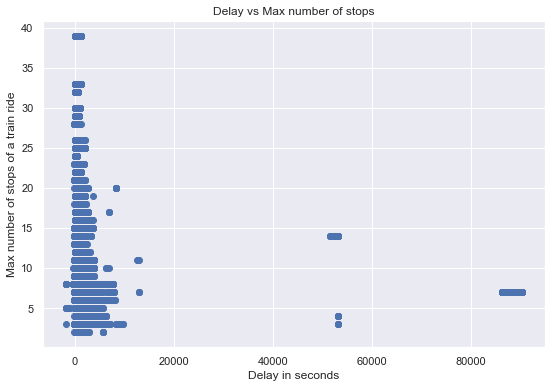

In [40]:
# scatter plot of delay against max number of stops
plt.figure(figsize=(9, 6))
plt.scatter(x=January['Train_Delay'], y=January['MaxNumberOfStops'])
plt.xlabel('Delay in seconds')
plt.ylabel('Max number of stops of a train ride')
plt.title('Delay vs Max number of stops')

* As we can see from the graph the least max amount of stops is 40 stops. Most trains have an max amount of stops between 3 and 10. The longest delay in a train ride is between 80 000 and 100 000. Most trains have less than 20000 seconds delay. 

#### Distribution of the train delay 

Text(0.5, 0, 'The delay in seconds')

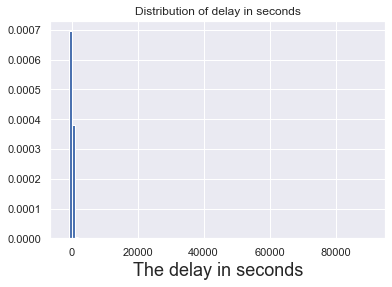

In [41]:
#distribution of the train delay  in histograph
plt.hist(np.asarray(January.dropna().Train_Delay), 100, density=1);
plt.title('Distribution of delay in seconds')
plt.xlabel('The delay in seconds', fontsize=18)


* Most of the train delays are around 0 seconds and most of them are probably under an hour. maybe we should zoom in to investigate deeper into that. 

Text(0.5, 0, 'The delay in seconds')

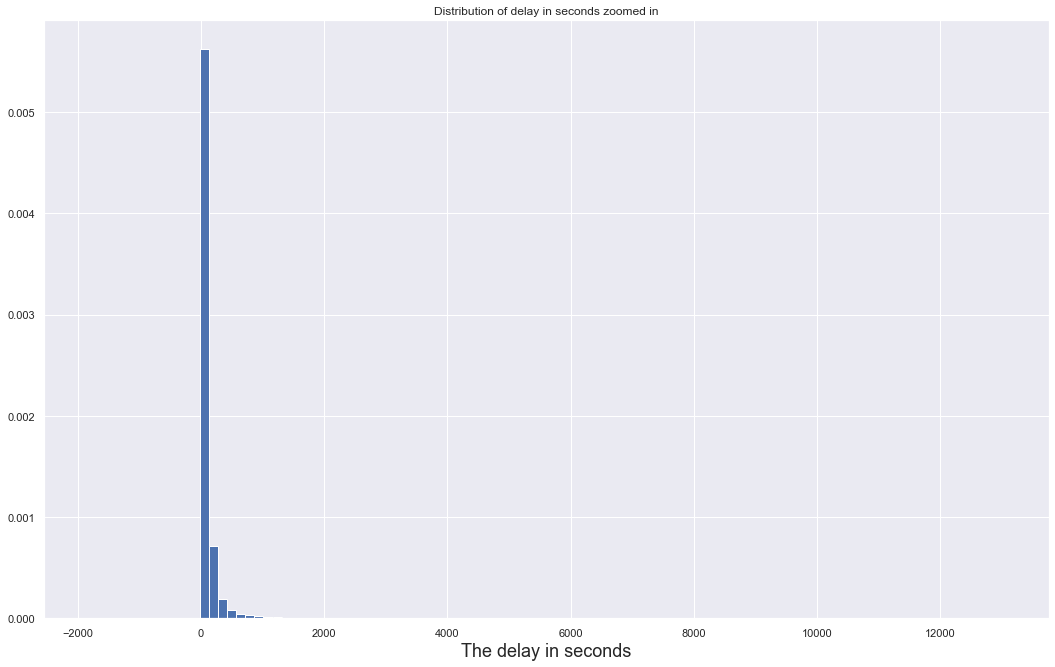

In [88]:
#distribution of the train delay  in histograph
plt.hist(np.asarray(January[January['Train_Delay']<20000].dropna().Train_Delay), 100, density=1);
plt.title('Distribution of delay in seconds zoomed in')
plt.xlabel('The delay in seconds', fontsize=18)

in the graph above you can see that most of the delays are between 0 and 1000 seconds which is 0 and ~17 minutes. most of it still lays around the 0.

#### Distribution of the max number of stops

Text(0.5, 0, 'Max number of stops')

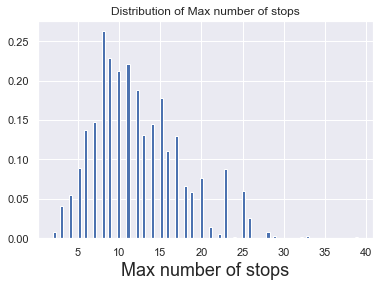

In [42]:
# distribution of the max number of stops in a histograph
plt.hist(np.asarray(January.dropna().MaxNumberOfStops), 100, density=1);
plt.title('Distribution of Max number of stops')
plt.xlabel('Max number of stops', fontsize=18)


* The histogram follows almost a standart normal distribution. Most numbers of maximum stops that a train can have is 10. 

#### Distribution of maximum trains stops per ride

Text(0.5, 0, 'Max number of stops')

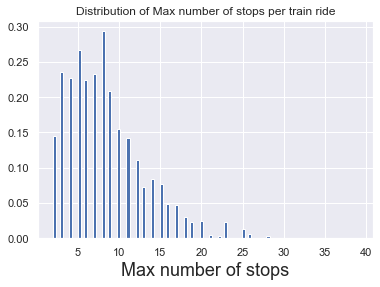

In [43]:
#make a distribution plot where the max number of stops per train number and planned destination is only once in the dataset
MaxStops=January.groupby(['Train_Number','Train_Destination_Planned'])['MaxNumberOfStops'].mean()
MaxStops=pd.DataFrame(MaxStops)
plt.hist(np.asarray(MaxStops.dropna().MaxNumberOfStops), 100, density=1);
plt.title('Distribution of Max number of stops per train ride')
plt.xlabel('Max number of stops', fontsize=18)

* Most stops per train number to a planned destination are between 4 to 10. this graphs has more max amounts of stops under 10 because it only gives one for each unique combination of train number and train destination planned. that takes care of that rides that have a max of 40 stops arent 40 times in the dataset.

## Total delay

In [44]:
#First we get the Total delay per day in seconds
import matplotlib.pyplot as plt
TotalDelayDay = January.groupby('DepartureDateActual')['Train_Delay'].sum().reset_index()
TotalDelayDay

,DepartureDateActual,Train_Delay
0,2015-12-31,1364.0
1,2016-01-01,6026458.0
2,2016-01-02,5795138.0
3,2016-01-03,13356435.0
4,2016-01-04,15561928.0
5,2016-01-05,15529623.0
6,2016-01-06,12811218.0
7,2016-01-07,14615727.0
8,2016-01-08,16172435.0
9,2016-01-09,7565149.0


#### Total delay per day in seconds in January

Text(0, 0.5, 'Duration of a delay in seconds')

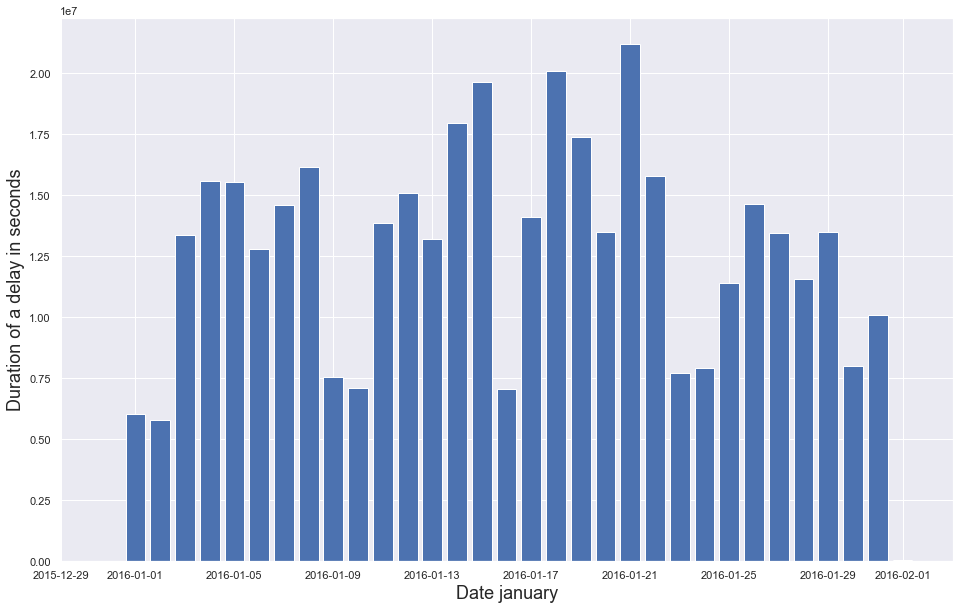

In [45]:
#Then we visualise it with bargraph
plt.figure(figsize=(16,10))
plt.bar(TotalDelayDay['DepartureDateActual'],TotalDelayDay['Train_Delay'])
plt.xlabel('Date january', fontsize=18)
plt.ylabel('Duration of a delay in seconds', fontsize=18)

* It seems to be a weekly pattern that there are less delays around the weekend. 

## Average delay per day

In [46]:
#Firt we extract the day of the week in a new column
January['weekday'] = January['DepartureDateActual'].dt.dayofweek
January

,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,DepartureDatePlanned,DepartureTimePlanned,DepartureDateActual,DepartureTimeActual,MaxNumberOfStops,weekday
0,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Haarlem Spaarnwoude,2016-01-01 00:10:00,2016-01-01 00:10:00,0.0,2016-01-01,00:00:00,2016-01-01,00:00:00,11,4
1,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Bad Nieuweschans,2016-01-01 00:10:00,2016-01-01 00:10:00,0.0,2016-01-01,00:00:00,2016-01-01,00:00:00,10,4
2,DVD,Duivendrecht,7495,Sprinter,NS,Utrecht Centraal,Duivendrecht,2016-01-01 00:11:00,2016-01-01 00:11:00,0.0,2016-01-01,00:00:00,2016-01-01,00:00:00,11,4
3,DDRS,Dordrecht Stadspolders,36795,Stoptrein,Arriva,Gorinchem,Dordrecht Stadspolders,2016-01-01 00:11:00,2016-01-01 00:11:00,0.0,2016-01-01,00:00:00,2016-01-01,00:00:00,8,4
4,EMNZ,Emmen Zuid,8083,Stoptrein,Arriva,Emmen,Emmen Zuid,2016-01-01 00:11:00,2016-01-01 00:11:00,0.0,2016-01-01,00:00:00,2016-01-01,00:00:00,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458993,DDRS,Dordrecht Stadspolders,36782,Stoptrein,Arriva,Dordrecht,Dordrecht,2016-01-31 22:58:00,2016-01-31 22:58:00,0.0,2016-01-31,00:00:00,2016-01-31,00:00:00,12,6
5458994,HIL,Hillegom,6395,Sprinter,NS,Leiden Centraal,Leiden Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,0.0,2016-01-31,00:00:00,2016-01-31,00:00:00,5,6
5458995,DT,Delft,5182,Sprinter,NS,Den Haag Centraal,Den Haag Centraal,2016-01-31 23:00:00,2016-01-31 23:00:00,0.0,2016-01-31,00:00:00,2016-01-31,00:00:00,20,6
5458996,VB,Voorburg,9893,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-01-31 23:01:00,2016-01-31 23:01:00,0.0,2016-01-31,00:00:00,2016-01-31,00:00:00,12,6


In [47]:
#We get the average per day of the week
AverageDelayDay = January.groupby('weekday')['Train_Delay'].mean().reset_index()
AverageDelayDay

,weekday,Train_Delay
0,0,78.878189
1,1,79.840338
2,2,69.468027
3,3,82.547173
4,4,77.300705
5,5,47.387056
6,6,78.816216


Text(0, 0.5, 'Duration of a delay in seconds')

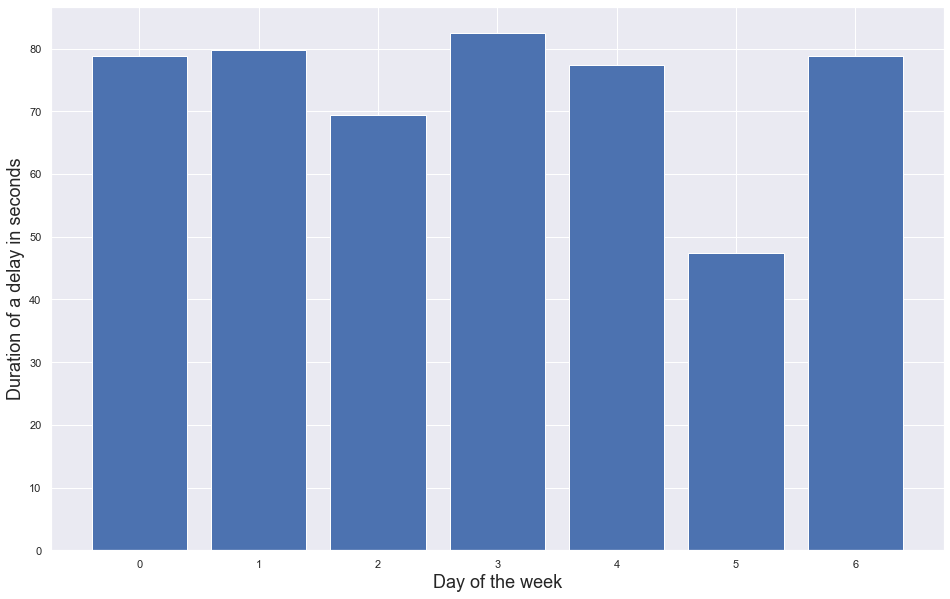

In [48]:
#Then we visualise it with bargraph
plt.figure(figsize=(16,10))
plt.bar(AverageDelayDay['weekday'],AverageDelayDay['Train_Delay'])
plt.xlabel('Day of the week', fontsize=18)
plt.ylabel('Duration of a delay in seconds', fontsize=18)

* We have least delays on Saturdays. (monday is 0 in the graph and sunday is 6 etc). The most that the average delay per day can last is a bit more than 80 seconds (per stop). The least delay is of almost 50 seconds (per stop). 

## Percent delays

In [49]:
from datetime import timedelta
delta = 0

def percentage(part, whole):
  return 100 * float(part)/float(whole)

total = len(January)
delays = len(January[January['Train_Delay'] > delta])
perc = percentage(delays,total)

print('The count of delays: {}'.format(delays))
print('The total train departures count: {}'.format(total))
print('Percentage of delay for January: {:.6f}'.format(perc))

The count of delays: 2046304
The total train departures count: 5458998
Percentage of delay for January: 37.484974


The percentage is 37%.

We can also show the delays between the different train companies to get a better insight. This can be done using pie plot.

In [50]:
# Percentage calculation
#Delay duration for the whole month per train company
compdelays = January[January['Train_Delay'] > delta].groupby(['Train_Company'])['Train_Delay'].count().reset_index()
compdelays['Percentage (of total)'] = compdelays['Train_Delay'] / total * 100
compdelays['Percentage (of companies)'] = compdelays['Train_Delay'] / delays * 100
compdelays = compdelays.sort_values(by="Train_Delay", ascending=False)

compdelays

,Train_Company,Train_Delay,Percentage (of total),Percentage (of companies)
6,NS,1707131,31.271874,83.425092
0,Arriva,213745,3.915462,10.445418
9,Veolia,82405,1.509526,4.027017
8,Valleilijn,19526,0.357685,0.954208
7,Syntus,9333,0.170965,0.456091
1,Breng,5643,0.103371,0.275765
5,NMBS,4570,0.083715,0.223329
2,DB,3389,0.062081,0.165616
4,LTE,354,0.006485,0.017299
3,Keolis,192,0.003517,0.009383


Text(0, 0.5, 'Proportion of delay in percents.')

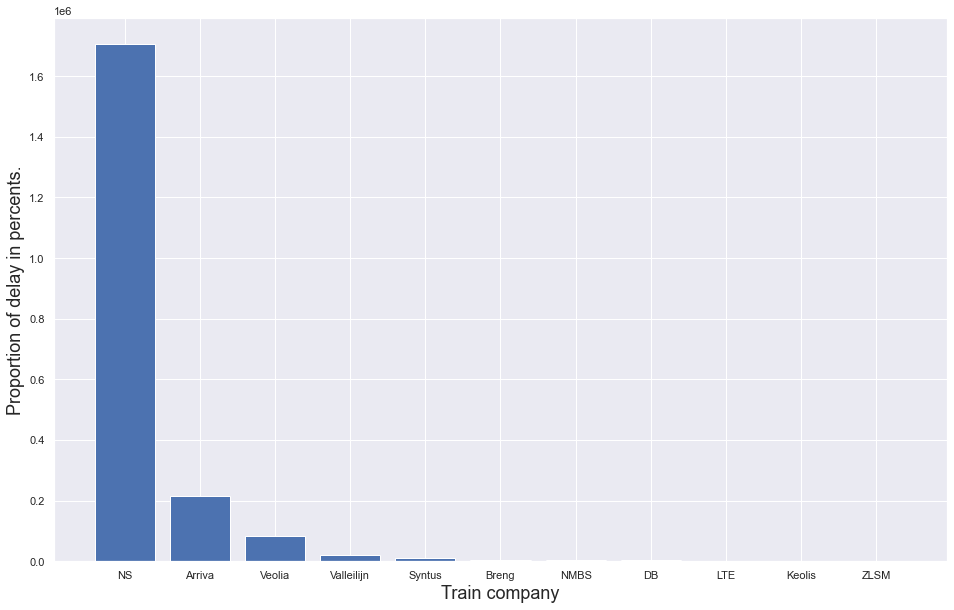

In [51]:
plt.figure(figsize=(16,10))
plt.bar(compdelays['Train_Company'],compdelays['Train_Delay'])
plt.xlabel('Train company', fontsize=18)
plt.ylabel('Proportion of delay in percents.', fontsize=18)

* The most delays are recorded in NS followed by Arriva, Veolia, Valleilijn, Syntus. Breng, NMBS, DB, LTE, Keolis and ZLSM has so little delay that you cannot see it in the graph.

Here we see the delay percentage of the total train departures and the percentage between the other train companies.

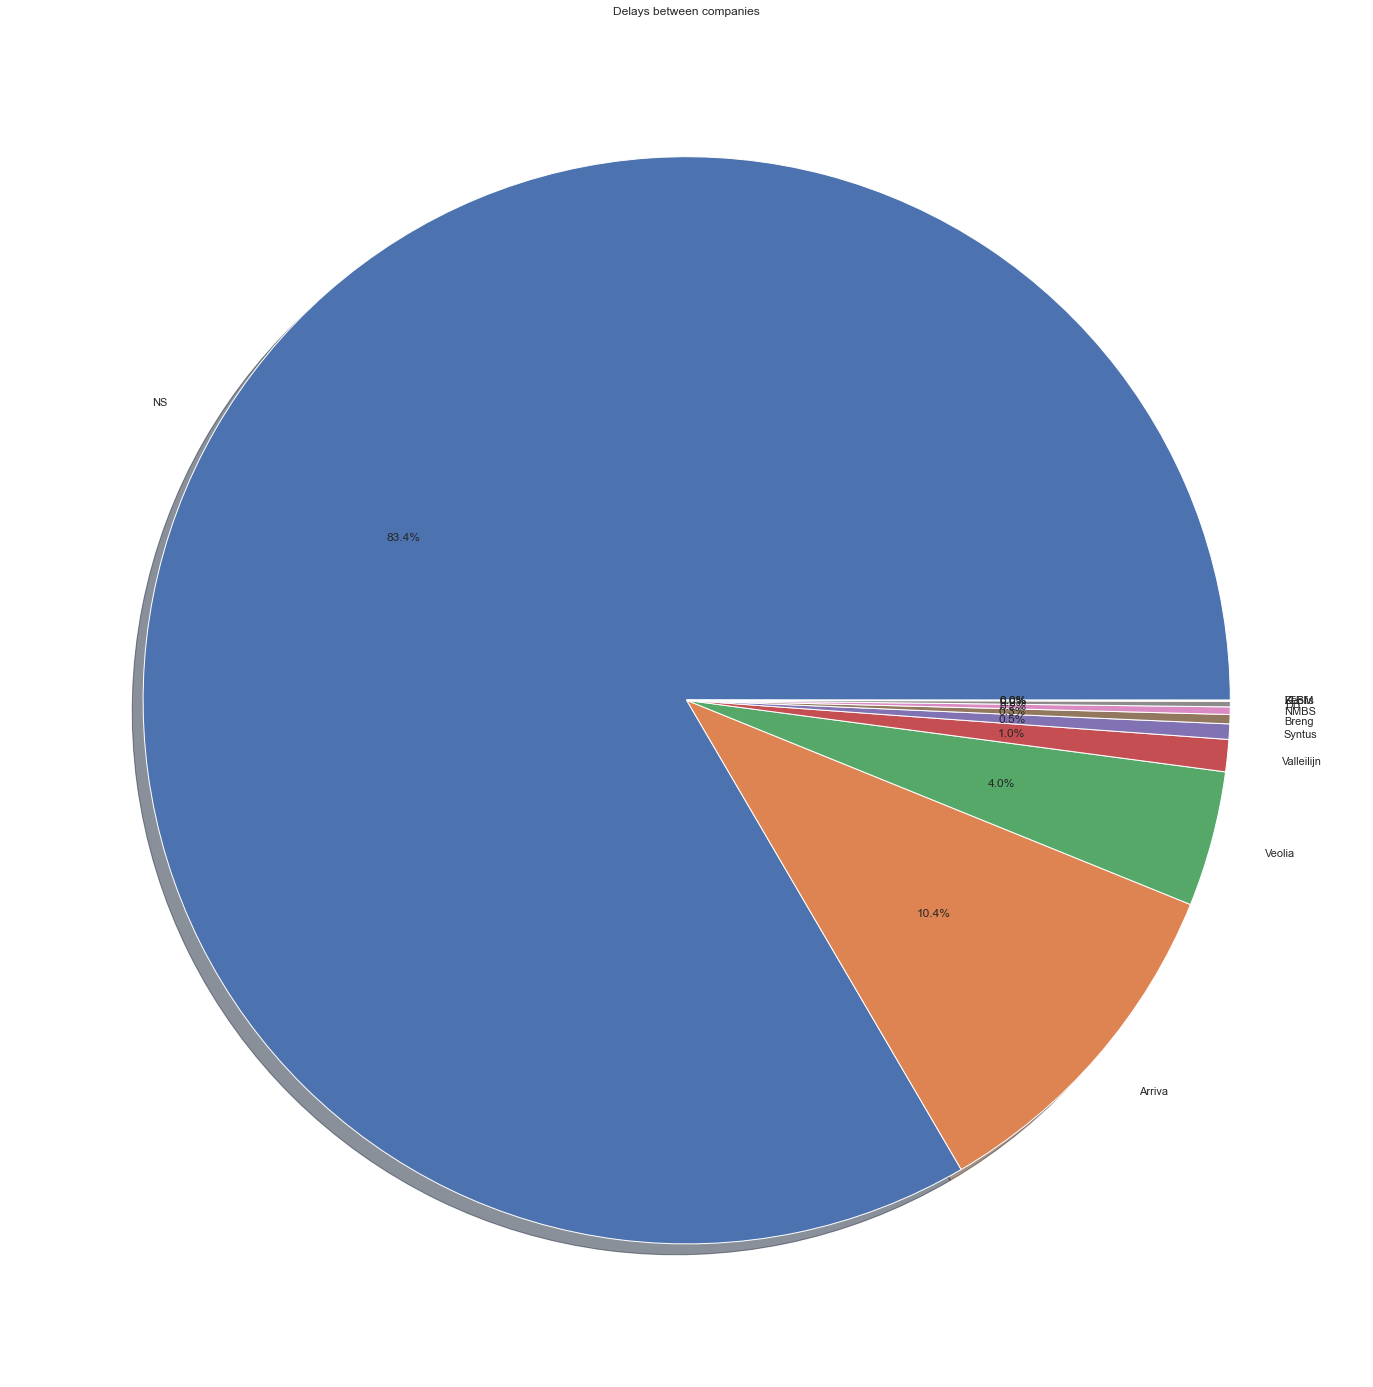

In [52]:
def func(pct):
  return "{:1.1f}%".format(pct)

plt.figure(figsize=(25,25))
plt.pie(compdelays['Train_Delay'], labels=compdelays['Train_Company'], autopct=lambda pct: func(pct), shadow=True)
plt.title('Delays between companies')
plt.show()

From the plot we see that NS have the most delays compared to the other companies.

In addition, we can plot the stations where delay occurs (may be useful). We are getting only the top 12 stations, sorted from least to most delays in the bar plot.
* NB Could group the small ones into "others"

Number of stations: 401


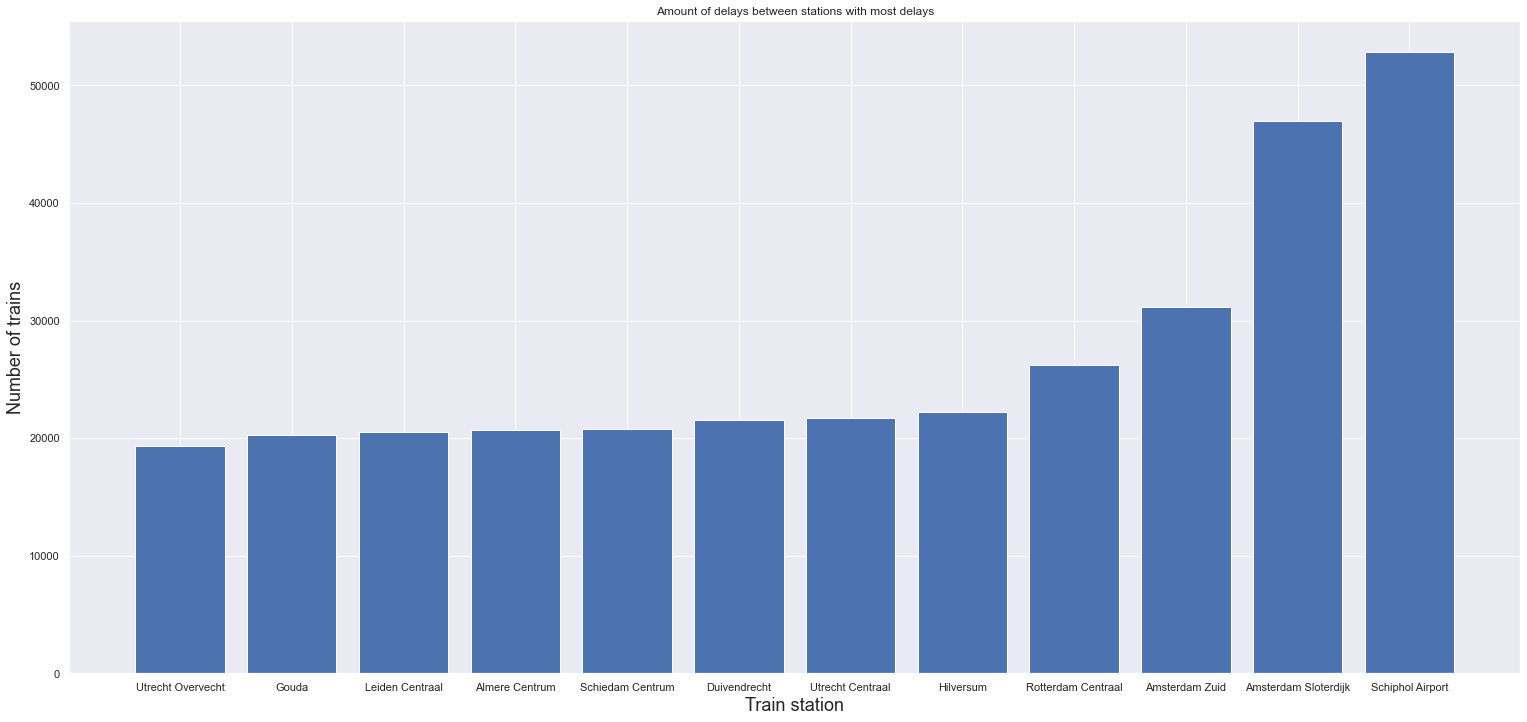

In [53]:
print("Number of stations: {}".format(len(January[January['Train_Delay'] > delta]['Station_Name'].unique())))

compdelays = January[January['Train_Delay'] > delta].groupby(['Station_Name'])['Train_Delay'].count().reset_index().sort_values(by=['Train_Delay'])[-12:]
 
plt.figure(figsize=(26,12))
plt.bar(compdelays['Station_Name'],compdelays['Train_Delay'])
plt.title('Amount of delays between stations with most delays')
plt.xlabel('Train station', fontsize=18)
plt.ylabel('Number of trains', fontsize=18)
plt.show()

We observe that Schiphol Airport, Amsterdam Sloterdijk, Amsterdam Zuid and Rotterdam Centrall have the most delays for January.
The delays last more than 50000 seconds at most and a bit less than 20000 seconds the least. 
## Amount of delays

In [54]:
#Add a column for the day of the week
January['day_of_week'] = January['DepartureDatePlanned'].dt.day_name()

In [55]:
from datetime import timedelta

#For now, we will call it a delay when there is a minimum delay of 2 minutes
#Example: 5 seconds delay, will not be called a delay, but 2 minutes will
delta = 2

#Calculate how many delays each date will have
amountDelays = January[January['Train_Delay'] >= delta].groupby(['DepartureDatePlanned'])['Train_Delay'].count().reset_index()
amountDelays = amountDelays.sort_values(by="DepartureDatePlanned", ascending=True)

#Add the day of the week
amountDelays['day_of_week'] = amountDelays['DepartureDatePlanned'].dt.day_name()

amountDelays

,DepartureDatePlanned,Train_Delay,day_of_week
0,2015-12-31,7,Thursday
1,2016-01-01,38772,Friday
2,2016-01-02,44130,Saturday
3,2016-01-03,43071,Sunday
4,2016-01-04,78256,Monday
5,2016-01-05,75926,Tuesday
6,2016-01-06,67611,Wednesday
7,2016-01-07,77137,Thursday
8,2016-01-08,78831,Friday
9,2016-01-09,49463,Saturday


Text(0, 0.5, 'Amount of delay')

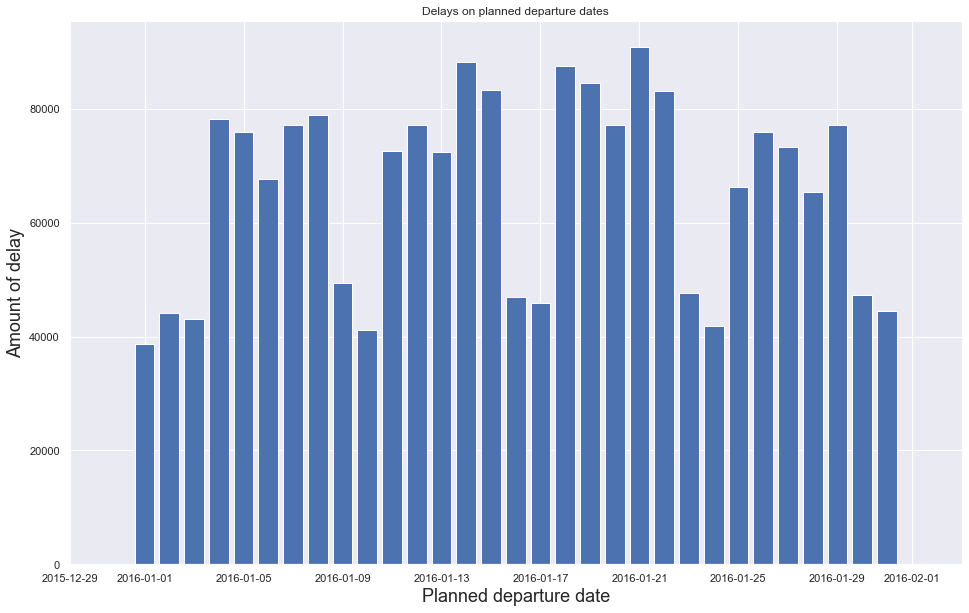

In [56]:
plt.figure(figsize=(16,10))
plt.title('Delays on planned departure dates')
plt.bar(amountDelays['DepartureDatePlanned'],amountDelays['Train_Delay'])
plt.xlabel('Planned departure date', fontsize=18)
plt.ylabel('Amount of delay', fontsize=18)

Here we see how many delays each date has, where the weekends have the least amount of delays just like the total turation per date graph. this indicates that the numbers of delay and total duration of delay per day is in proportion with each other.

  day_of_week  Train_Delay
3      Sunday     43238.80
2    Saturday     47021.00
1      Monday     60853.20
4    Thursday     64268.20
0      Friday     72180.80
6   Wednesday     72533.25
5     Tuesday     78276.75


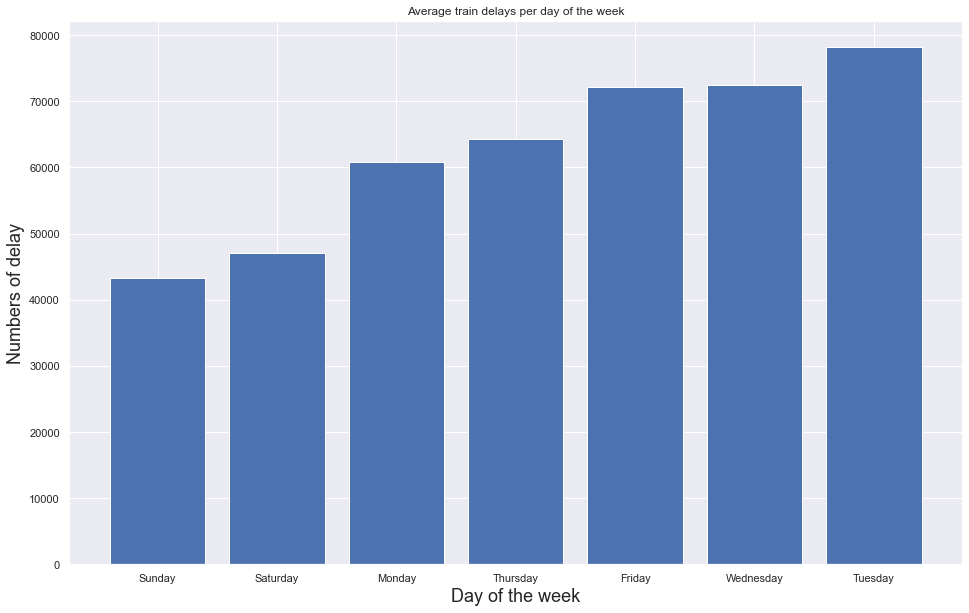

In [97]:
amountDelaysPerDay = January[January['Train_Delay'] > delta].groupby(['DepartureDatePlanned', 'day_of_week'])['Train_Delay'].count().groupby(['day_of_week']).mean().reset_index().sort_values(by=['Train_Delay'])
print(amountDelaysPerDay)

plt.figure(figsize=(16,10))
plt.bar(amountDelaysPerDay['day_of_week'],amountDelaysPerDay['Train_Delay'])
plt.title('Average train delays per day of the week')
plt.xlabel('Day of the week', fontsize=18)
plt.ylabel('Numbers of delay', fontsize=18)
plt.show()

here you can see the average number of delay per day in the week. like we saw in the per day of the month grap sunday has the least amount of delays followed by saturday. with the lowest average amount of delays around 42000 and the most at around 78000.

## correlation part 1

In [64]:
import isodate
df = pd.read_csv('January.csv')
df = df.drop(columns = 'Unnamed: 0')
df = df.rename(columns={"Station Code": "Station_Code", "Station Name": "Station_Name", "Train Number": "Train_Number", "Train Type": "Train_Type", "Train Company": "Train_Company", "Train Destination Planned": "Train_Destination_Planned", "Train Destination Actual": "Train_Destination_Actual", "Train Departure Planned": "Train_Departure_Planned", "Train Departure Actual": "Train_Departure_Actual", "Train Delay": "Train_Delay"})

In [65]:
pd.unique(df.Train_Number)

array([ 14882,  37598,   7495, ..., 305259, 303368, 305873], dtype=int64)

In [66]:
pd.value_counts(df.Train_Number)

12685     3894
12683     3727
4082      3623
5756      3566
5765      3564
          ... 
309671       1
301685       1
303520       1
300769       1
300567       1
Name: Train_Number, Length: 8046, dtype: int64

In [67]:
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):  # more options can be specified also
    print(pd.value_counts(df.Train_Number))

dfBigTrain = df.loc[df['Train_Number'] == 12683]
dfBigTrain
df['Train_Delay_Seconds'] = df.apply(lambda row: isodate.parse_duration(row.Train_Delay), axis=1)
df
df.dtypes

12685     3894
12683     3727
4082      3623
5756      3566
5765      3564
          ... 
309671       1
301685       1
303520       1
300769       1
300567       1
Name: Train_Number, Length: 8046, dtype: int64


Station_Code                          object
Station_Name                          object
Train_Number                           int64
Train_Type                            object
Train_Company                         object
Train_Destination_Planned             object
Train_Destination_Actual              object
Train_Departure_Planned               object
Train_Departure_Actual                object
Train_Delay                           object
Train_Delay_Seconds          timedelta64[ns]
dtype: object

In [68]:
df['Train_Delay_Seconds'] = df.apply(lambda row: row.Train_Delay_Seconds.total_seconds(), axis=1)
df
pd.unique(df['Train_Type'])

array(['Sprinter', 'Stoptrein', 'Intercity', 'Intercity direct',
       'Sneltrein', 'Thalys', 'CityNightLine/IC', 'Speciale Trein',
       'ICE International', 'Austria Express', 'Stoomtrein',
       'Extra trein', 'Panorama Rail'], dtype=object)

In [69]:
pd.get_dummies(df.Train_Type)
df = pd.concat([df, pd.get_dummies(df.Train_Type)], axis=1);
df
df.dtypes

Station_Code                  object
Station_Name                  object
Train_Number                   int64
Train_Type                    object
Train_Company                 object
Train_Destination_Planned     object
Train_Destination_Actual      object
Train_Departure_Planned       object
Train_Departure_Actual        object
Train_Delay                   object
Train_Delay_Seconds          float64
Austria Express                uint8
CityNightLine/IC               uint8
Extra trein                    uint8
ICE International              uint8
Intercity                      uint8
Intercity direct               uint8
Panorama Rail                  uint8
Sneltrein                      uint8
Speciale Trein                 uint8
Sprinter                       uint8
Stoomtrein                     uint8
Stoptrein                      uint8
Thalys                         uint8
dtype: object

In [70]:
df = pd.concat([df, pd.get_dummies(df.Train_Company)], axis=1);
df
pd.unique(df.Station_Name).shape

(403,)

<AxesSubplot:>

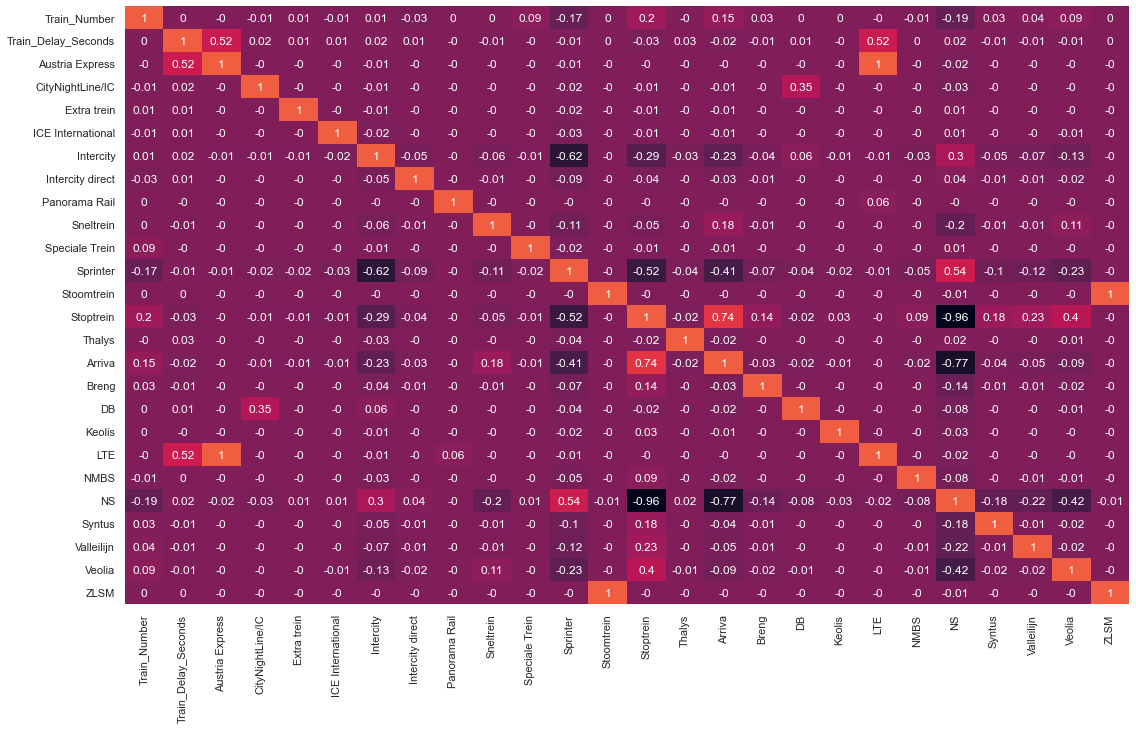

In [71]:
sns.set(rc={'figure.figsize':(18,11)})
sns.heatmap(df.corr().round(decimals=2), annot=True, cbar=None, vmax=2)

Train Type Austria Express has the highest delay correlation at 0.52 
(However Austria Express as a Train Type is only present in 472 rows in the whole month of January)

In [72]:
pd.value_counts(df.Train_Type)

Sprinter             2852909
Intercity            1413521
Stoptrein            1081923
Sneltrein              54984
Intercity direct       36870
Thalys                  9855
ICE International       3748
Extra trein             2010
Speciale Trein          1436
CityNightLine/IC        1162
Austria Express          472
Stoomtrein               106
Panorama Rail              2
Name: Train_Type, dtype: int64

In [73]:
dfAustriaExpress = df.loc[df['Train_Type'] == 'Austria Express']
print(pd.value_counts(dfAustriaExpress.Train_Delay_Seconds).to_string())
dfLTE = df.loc[df['Train_Company'] == 'LTE']
print(pd.value_counts(dfLTE.Train_Delay_Seconds).to_string())
dfAustriaExpress.dtypes
print(pd.unique(dfAustriaExpress.Train_Destination_Planned))

0.0        118
86400.0     16
7200.0       8
6945.0       6
420.0        6
6789.0       5
362.0        4
7560.0       4
86908.0      4
87460.0      4
120.0        3
478.0        3
89993.0      3
87324.0      3
90448.0      3
87210.0      3
240.0        3
63.0         3
129.0        3
86736.0      3
87805.0      3
954.0        2
7259.0       2
6960.0       2
86763.0      2
86575.0      2
7869.0       2
7491.0       2
6482.0       2
6667.0       2
87407.0      2
7395.0       2
6990.0       2
7469.0       2
7421.0       2
2400.0       2
220.0        2
86915.0      2
187.0        2
87496.0      2
7392.0       2
7207.0       2
87594.0      2
87679.0      2
7666.0       2
6900.0       2
4867.0       2
498.0        2
696.0        2
272.0        2
578.0        2
527.0        2
755.0        2
329.0        2
8040.0       2
89159.0      2
86520.0      2
64.0         2
193.0        2
143.0        2
90380.0      2
89429.0      2
1080.0       1
86863.0      1
1020.0       1
90318.0      1
86486.0   

### Let's remove Austria Express as it's actually an international train

<AxesSubplot:>

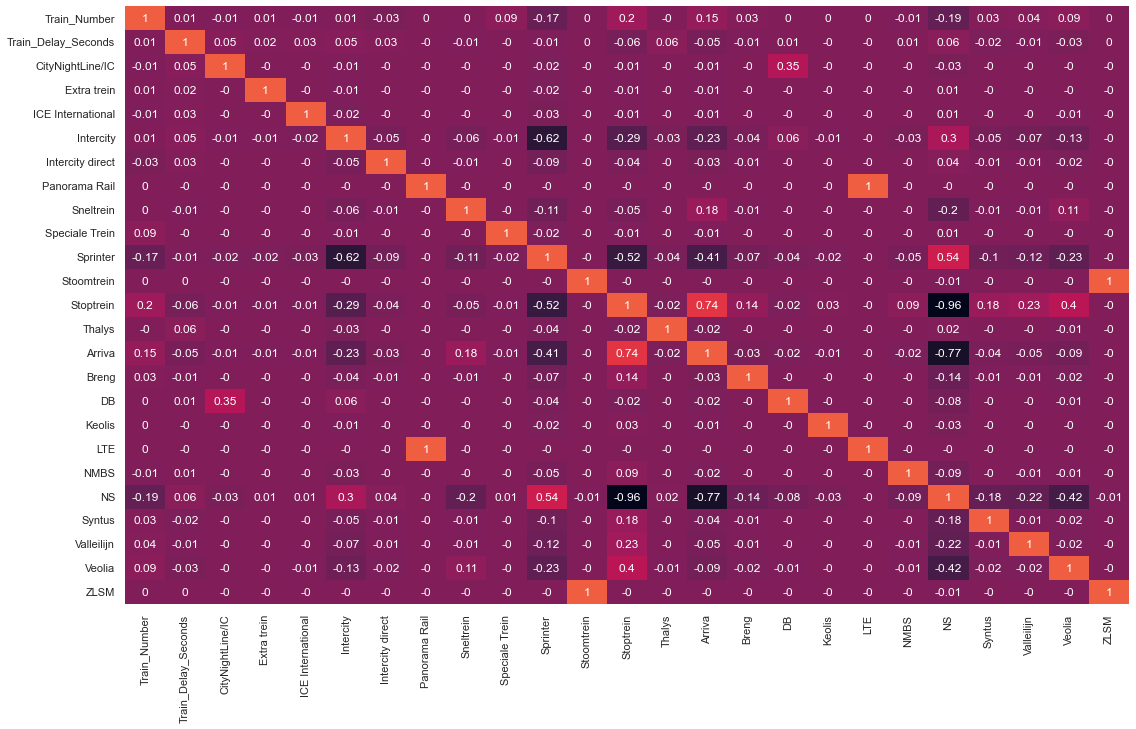

In [74]:
df = df[df['Train_Type'] != 'Austria Express']
df
df = df.drop(columns = 'Austria Express')
sns.set(rc={'figure.figsize':(18,11)})
sns.heatmap(df.corr().round(decimals=2), annot=True, cbar=None, vmax=2)

now the austra express is gone every thing has a super low correlation with the train delay

In [75]:
pd.unique(df.Train_Destination_Planned).shape

(135,)

In [76]:
pd.unique(df.Train_Number).shape

(8044,)

In [77]:
pd.value_counts(df.Train_Destination_Planned)

Den Haag Centraal     429778
Utrecht Centraal      336237
Amsterdam Centraal    293633
Zwolle                287166
Nijmegen              264959
                       ...  
Maarn                      5
Heerenveen                 4
Delft                      2
Boxtel                     2
Almere Centrum             1
Name: Train_Destination_Planned, Length: 135, dtype: int64

In [78]:
dfDenHaag = df.loc[df['Train_Destination_Planned'] == 'Den Haag Centraal']
dfDenHaag
pd.unique(dfDenHaag.Station_Name).shape

(97,)

## correlation part 2

In [79]:
df1 = pd.read_csv("January.csv")
df1
df1 = df1.drop(columns = 'Unnamed: 0')
df1 = df1.rename(columns={"Station Code": "Station_Code", "Station Name": "Station_Name", "Train Number": "Train_Number", "Train Type": "Train_Type", "Train Company": "Train_Company", "Train Destination Planned": "Train_Destination_Planned", "Train Destination Actual": "Train_Destination_Actual", "Train Departure Planned": "Train_Departure_Planned", "Train Departure Actual": "Train_Departure_Actual", "Train Delay": "Train_Delay"})
df1['Train_Delay_Seconds'] = df1.apply(lambda row: isodate.parse_duration(row.Train_Delay).total_seconds(), axis=1)
dfNijmegen = df1.loc[df1['Train_Destination_Planned'] == 'Nijmegen']
dfNijmegen
pd.value_counts(dfNijmegen['Train_Delay_Seconds'])
pd.unique(dfNijmegen.Station_Name).shape

(71,)

<AxesSubplot:>

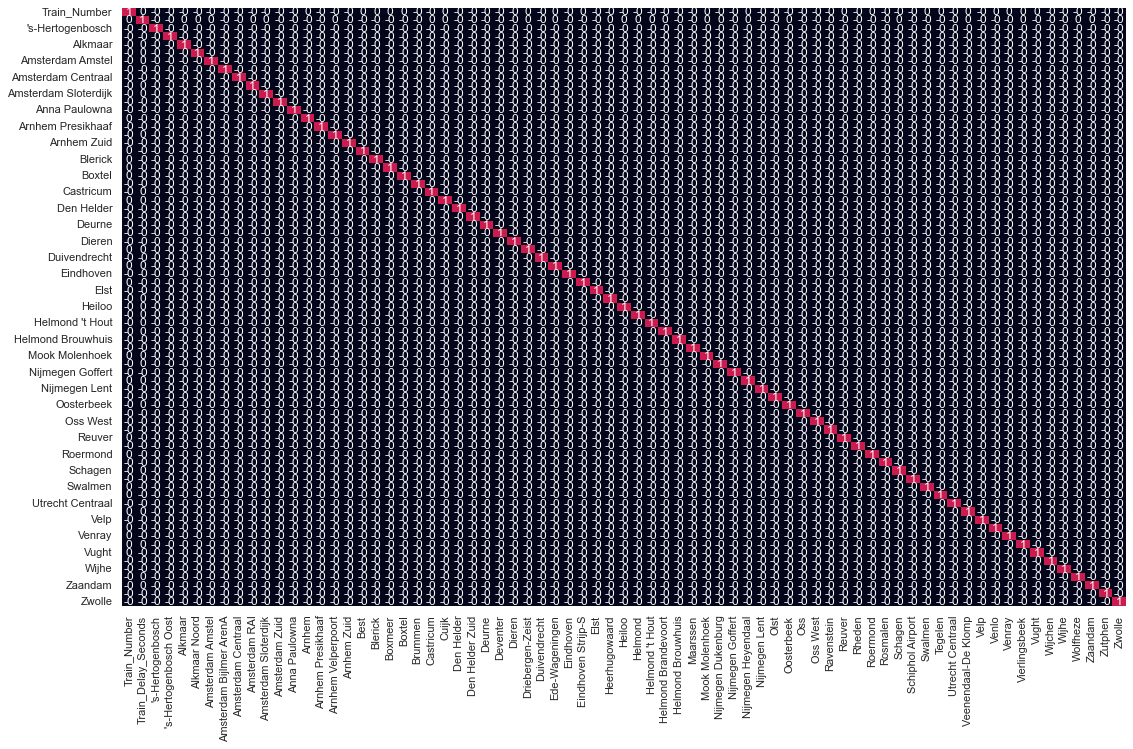

In [80]:
dfNijmegen = pd.concat([dfNijmegen, pd.get_dummies(dfNijmegen.Station_Name)], axis=1);
dfNijmegen
sns.set(rc={'figure.figsize':(18,11)})
sns.heatmap(dfNijmegen.corr().round(decimals=0), annot=True, cbar=None, vmax=2)

For nijmegen everything seems to have no correlation with each other.

## NaNs per month

In this step we can go through each month and see how many nan values are there. For that, first we need to create an array that will hold every month.

In [81]:
months = [January,February,March,April,May,June, July, August, September, October, November, December]

Then we can create a array that will hold all the nan values. In a for loop we can go through each month and add every feature that have NaN values to the array.

In [100]:
total_nans = []

for i, month in enumerate(months):
    m = i + 1 # the number of the month, + ` because index starts with 0
    nans = month.isna().sum()[month.isna().sum() > 0]
    
    total_nans.append(nans)
    # Showing the features with the amount of nans for each month
    print("For month {}: \n  {}".format(m,nans))

For month 1: 
  Station_Code    8519
dtype: int64
For month 2: 
  Station Code    7789
dtype: int64
For month 3: 
  Station Code    8544
dtype: int64
For month 4: 
  Station Code    3347
dtype: int64
For month 5: 
  Station Code    9096
dtype: int64
For month 6: 
  Station Code    8255
dtype: int64
For month 7: 
  Station Code    9424
dtype: int64
For month 8: 
  Station Code    8932
dtype: int64
For month 9: 
  Station Code    8705
dtype: int64
For month 10: 
  Station Code    8931
dtype: int64
For month 11: 
  Station Code    9811
dtype: int64
For month 12: 
  Station Code    1917
dtype: int64


Then we create a dataframe of the array with nans, so it is easier to visualize the data. In addition we are creating a months column that will hold the names of the months, instead of just a number. This is done using map().

In [83]:
nulls = pd.DataFrame(total_nans).reset_index()

nulls['months'] = nulls['index'].map({0:'January',1:'February',2:'March',3:'April',4:'May',5:'June',6:'July',7:'August',8:'September',9:'October',10:'November',11:'December'})
# And to see the dataframe
nulls

,index,Station_Code,Station Code,months
0,0,8519.0,NaN,January
1,1,NaN,7789.0,February
2,2,NaN,8544.0,March
3,3,NaN,3347.0,April
4,4,NaN,9096.0,May
5,5,NaN,8255.0,June
6,6,NaN,9424.0,July
7,7,NaN,8932.0,August
8,8,NaN,8705.0,September
9,9,NaN,8931.0,October


Now we can plot the nans for each month using the month column as x and the features with missing data as y. In our case it is only station code. For january, the column is called Station_Code and for the rest is Station Code and that is the reason for the bar plot to have 2 bars per month.

Text(0, 0.5, 'Missing data')

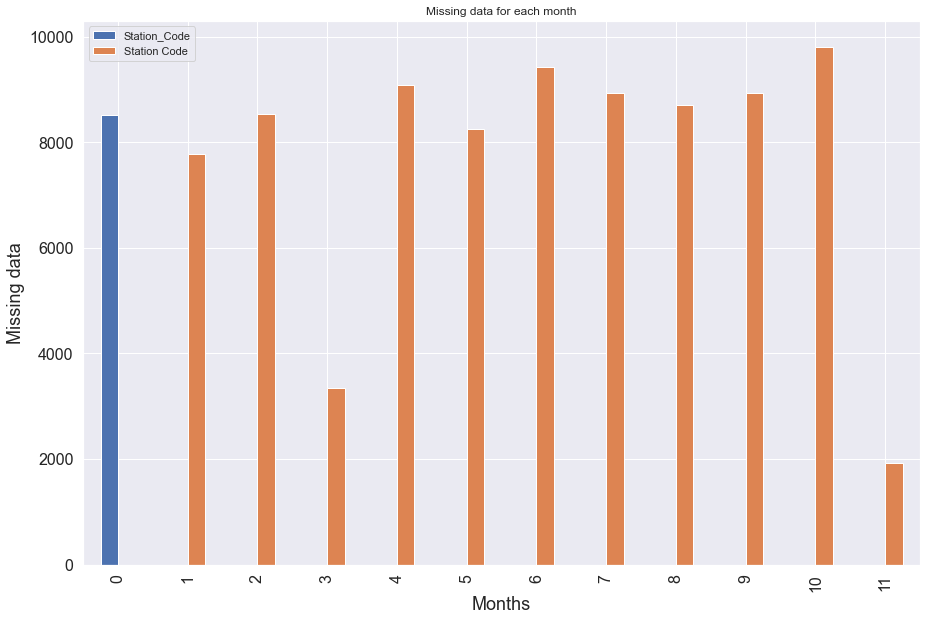

In [84]:
nulls.plot(x='index',
          y=['Station_Code','Station Code'],
          kind="bar", figsize=(15,10), title="Missing data for each month", fontsize=16)

plt.xlabel('Months', fontsize=18)
plt.ylabel('Missing data', fontsize=18)

for each month there seems to be around 8000 missing station code names with the exception of april and decemeber. 

But to have it in more readable dataframe, we can fix the column names and keep only the month names + nans.

In [85]:
# We are setting Station Code to be Station_Code for January
nulls.loc[nulls['months'] == 'January',"Station Code"] = nulls.loc[nulls['months'] == 'January',"Station_Code"]

# Dropping the unused columns
nulls = nulls.drop('Station_Code', axis=1)
nulls = nulls.drop('index', axis=1)

And we can see the nan values for each month from the month with the most nans to the month with least.

In [86]:
nulls.sort_values(by='Station Code', ascending=False)

,Station Code,months
10,9811.0,November
6,9424.0,July
4,9096.0,May
7,8932.0,August
9,8931.0,October
8,8705.0,September
2,8544.0,March
0,8519.0,January
5,8255.0,June
1,7789.0,February
